In [1]:
#import pandas as pd
import numpy as np
import pandas as pd

#to check the data type
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

#for visulazation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#to build and analyze various statistical models we use"statsmodels"
import scipy
import statsmodels
from scipy import stats
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency
from statsmodels.stats.multicomp import pairwise_tukeyhsd
#for multicolineraity
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
#linear regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
#for logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_curve,auc,roc_auc_score
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import confusion_matrix 
from sklearn.utils import resample
#for decision tree
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
#Bagging
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import BaggingRegressor
#Adaptive boosting 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
#GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
#for random forest 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
#Search methods
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
#Naive bayes classifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix, accuracy_score 
import warnings
warnings.filterwarnings("ignore")
#np.set_printoptions(suppress=True)

In [2]:
data= pd.read_csv("/kaggle/input/wine-quality-data-set-red-white-wine/wine-quality-white-and-red.csv")

#Basic information about data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 1599 entries, 0 to 1598

Data columns (total 12 columns):

 #   Column              Non-Null Count  Dtype  

---  ------              --------------  -----  

 0   fixedacidity        1599 non-null   float64

 1   volatileacidity     1599 non-null   float64

 2   citricacid          1599 non-null   float64

 3   residualsugar       1599 non-null   float64

 4   chlorides           1599 non-null   float64

 5   freesulfurdioxide   1599 non-null   float64

 6   totalsulfurdioxide  1599 non-null   float64

 7   density             1599 non-null   float64

 8   pH                  1599 non-null   float64

 9   sulphates           1599 non-null   float64

 10  alcohol             1599 non-null   float64

 11  quality             1599 non-null   int64  

dtypes: float64(11), int64(1)

memory usage: 150.0 KB


In [4]:
data.duplicated().sum()

240

In [5]:
#data.drop_duplicates(keep=False, inplace=True)

In [6]:
data.isnull().sum()

fixedacidity          0
volatileacidity       0
citricacid            0
residualsugar         0
chlorides             0
freesulfurdioxide     0
totalsulfurdioxide    0
density               0
pH                    0
sulphates             0
alcohol               0
quality               0
dtype: int64

In [7]:
data.nunique()

fixedacidity           96
volatileacidity       143
citricacid             80
residualsugar          91
chlorides             153
freesulfurdioxide      60
totalsulfurdioxide    144
density               436
pH                     89
sulphates              96
alcohol                65
quality                 6
dtype: int64

In [8]:
data.dtypes

fixedacidity          float64
volatileacidity       float64
citricacid            float64
residualsugar         float64
chlorides             float64
freesulfurdioxide     float64
totalsulfurdioxide    float64
density               float64
pH                    float64
sulphates             float64
alcohol               float64
quality                 int64
dtype: object

In [9]:
data['quality']=data['quality'].astype("object")

In [10]:
data.describe()

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [11]:
data.describe(include=object)

,quality
count,1599
unique,6
top,5
freq,681


In [12]:
data.shape

(1599, 12)

In [13]:
#filter the continous data
data_numeric=data.select_dtypes(include=np.number)
data_numeric

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [14]:
data_numeric.columns

Index(['fixedacidity', 'volatileacidity', 'citricacid', 'residualsugar',
       'chlorides', 'freesulfurdioxide', 'totalsulfurdioxide', 'density', 'pH',
       'sulphates', 'alcohol'],
      dtype='object')

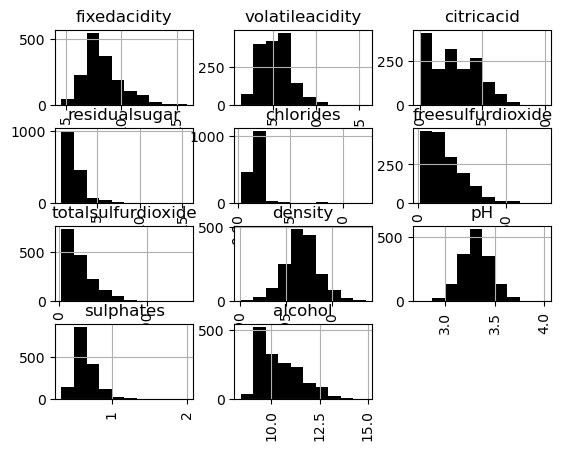

In [15]:
figsize=(30,20)
data_numeric.hist(xrot=90,color="black")
plt.show()

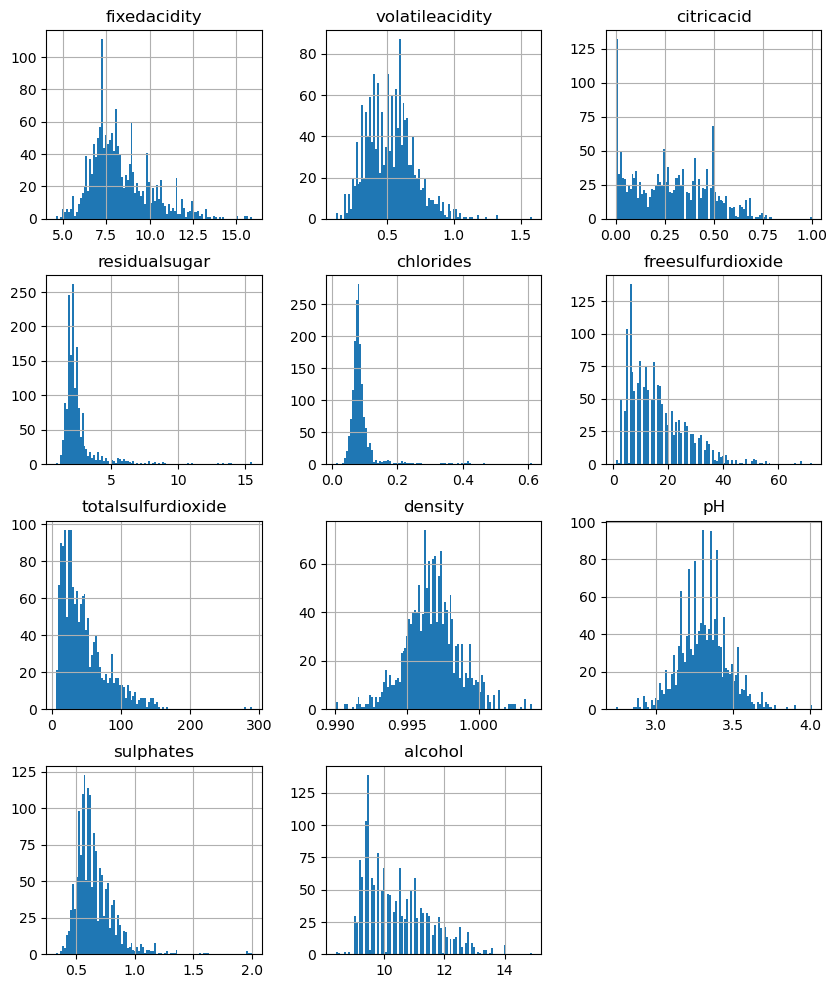

In [16]:
data_numeric.hist(bins=100,figsize=(10,12))
plt.show()

<AxesSubplot:xlabel='residualsugar'>

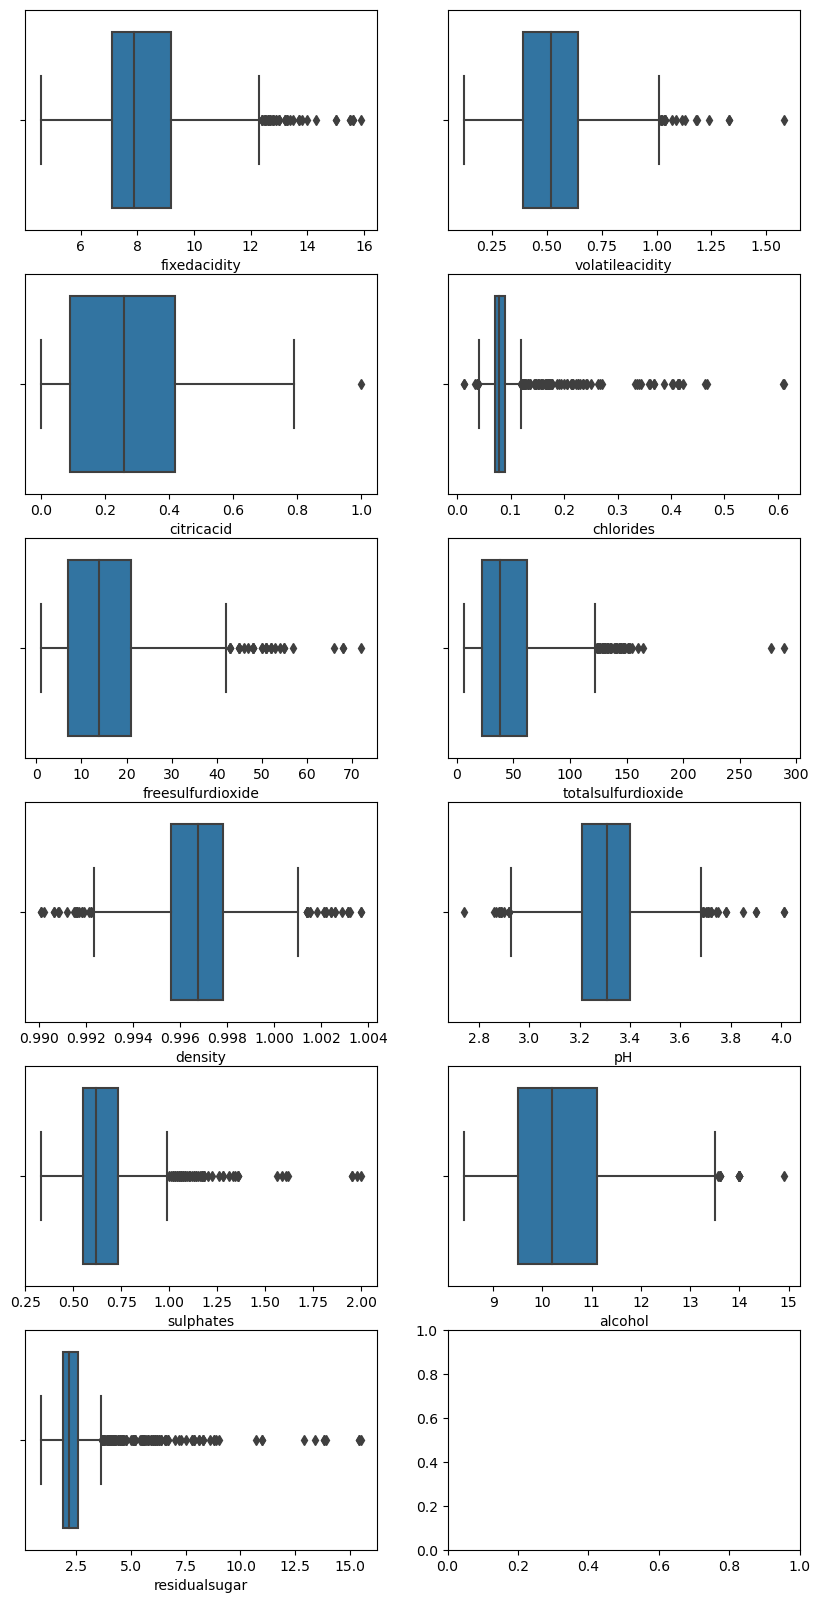

In [17]:
fig, axarr  = plt.subplots(6,2,figsize=(10,20))
sns.boxplot(x=data['fixedacidity'],ax=axarr[0,0])
sns.boxplot(x=data['volatileacidity'],ax=axarr[0,1])
sns.boxplot(x=data['citricacid'],ax=axarr[1,0])
sns.boxplot(x=data['chlorides'],ax=axarr[1,1])
sns.boxplot(x=data['freesulfurdioxide'],ax=axarr[2,0])
sns.boxplot(x=data['totalsulfurdioxide'],ax=axarr[2,1])
sns.boxplot(x=data['density'],ax=axarr[3,0])
sns.boxplot(x=data['pH'],ax=axarr[3,1])
sns.boxplot(x=data['sulphates'],ax=axarr[4,0])
sns.boxplot(x=data['alcohol'],ax=axarr[4,1])
sns.boxplot(x=data['residualsugar'],ax=axarr[5,0])

In [18]:
Q1= data.fixedacidity .quantile(0.25)
Q2= data.fixedacidity .quantile(0.50)
Q3= data.fixedacidity.quantile(0.75)
IQR = Q3 - Q1
lowerend = Q1 - (1.5 * IQR)
upperend = Q3 + (1.5 * IQR)

dfdia_outliers =data.fixedacidity[(data.fixedacidity < lowerend) | (data.fixedacidity>upperend)]
len(data.fixedacidity[data.fixedacidity> upperend])

49

In [19]:
data.fixedacidity= np.where(data.fixedacidity>upperend ,upperend,data.fixedacidity)
data.fixedacidity= np.where(data.fixedacidity <lowerend ,lowerend,data.fixedacidity )

In [20]:
Q1= data.volatileacidity.quantile(0.25)
Q2= data.volatileacidity .quantile(0.50)
Q3= data.volatileacidity.quantile(0.75)
IQR = Q3 - Q1
lowerend = Q1 - (1.5 * IQR)
upperend = Q3 + (1.5 * IQR)

dfdia_outliers = data.volatileacidity[(data.volatileacidity< lowerend)|(data.volatileacidity>upperend)]
len(data.volatileacidity[data.volatileacidity> upperend])

19

In [21]:
data.volatileacidity = np.where(data.volatileacidity >upperend ,upperend,data.volatileacidity )
data.volatileacidity= np.where(data.volatileacidity <lowerend ,lowerend,data.volatileacidity)

In [22]:
Q1= data.citricacid .quantile(0.25)
Q2= data.citricacid.quantile(0.50)
Q3= data.citricacid .quantile(0.75)
IQR = Q3 - Q1
lowerend = Q1 - (1.5 * IQR)
upperend = Q3 + (1.5 * IQR)

dfdia_outliers = data.citricacid[(data.citricacid< lowerend) | (data.citricacid> upperend)]
len(data.citricacid[data.citricacid> upperend])

1

In [23]:
data.citricacid = np.where(data.citricacid >upperend ,upperend,data.citricacid)
data.citricacid = np.where(data.citricacid <lowerend ,lowerend,data.citricacid)

In [24]:
Q1= data.chlorides .quantile(0.25)
Q2= data.chlorides .quantile(0.50)
Q3= data.chlorides .quantile(0.75)
IQR = Q3 - Q1
lowerend = Q1 - (1.5 * IQR)
upperend = Q3 + (1.5 * IQR)

dfdia_outliers = data.chlorides[(data.chlorides < lowerend) | (data.chlorides > upperend)]
len(data.chlorides[data.chlorides> upperend])

103

In [25]:
data.chlorides = np.where(data.chlorides >upperend ,upperend,data.chlorides )
data.chlorides = np.where(data.chlorides <lowerend ,lowerend,data.chlorides )

In [26]:
Q1= data.pH .quantile(0.25)
Q2= data.pH .quantile(0.50)
Q3= data.pH .quantile(0.75)
IQR = Q3 - Q1
lowerend = Q1 - (1.5 * IQR)
upperend = Q3 + (1.5 * IQR)

dfdia_outliers = data.pH[(data.pH < lowerend)|(data.pH > upperend)]
len(data.pH[data.pH> upperend])

21

In [27]:
data.pH = np.where(data.pH >upperend ,upperend,data.pH )
data.pH = np.where(data.pH <lowerend ,lowerend,data.pH)

In [28]:
Q1= data.freesulfurdioxide .quantile(0.25)
Q2= data.freesulfurdioxide .quantile(0.50)
Q3= data.freesulfurdioxide .quantile(0.75)
IQR = Q3 - Q1
lowerend = Q1 - (1.5 * IQR)
upperend = Q3 + (1.5 * IQR)

dfdia_outliers = data.freesulfurdioxide[(data.freesulfurdioxide < lowerend) | (data.freesulfurdioxide > upperend)]
len(data.freesulfurdioxide[data.freesulfurdioxide> upperend])

30

In [29]:
data.freesulfurdioxide = np.where(data.freesulfurdioxide >upperend ,upperend,data.freesulfurdioxide )
data.freesulfurdioxide = np.where(data.freesulfurdioxide <lowerend ,lowerend,data.freesulfurdioxide)

In [30]:
Q1= data.totalsulfurdioxide .quantile(0.25)
Q2= data.totalsulfurdioxide .quantile(0.50)
Q3= data.totalsulfurdioxide.quantile(0.75)
IQR = Q3 - Q1
lowerend = Q1 - (1.5 * IQR)
upperend = Q3 + (1.5 * IQR)

dfdia_outliers = data.totalsulfurdioxide[(data.totalsulfurdioxide<lowerend)|(data.totalsulfurdioxide>upperend)]
len(data.totalsulfurdioxide[data.totalsulfurdioxide> upperend])

55

In [31]:
data.totalsulfurdioxide = np.where(data.totalsulfurdioxide >upperend ,upperend,data.totalsulfurdioxide )
data.totalsulfurdioxide = np.where(data.totalsulfurdioxide <lowerend ,lowerend,data.totalsulfurdioxide )

In [32]:
Q1= data.density .quantile(0.25)
Q2= data.density .quantile(0.50)
Q3= data.density .quantile(0.75)
IQR = Q3 - Q1
lowerend = Q1 - (1.5 * IQR)
upperend = Q3 + (1.5 * IQR)

#dfdia_outliers = data.density[(data.density<lowerend)|(data.density>upperend)]
len(data.density[data.density> upperend])

24

In [33]:
data.density = np.where(data.density >upperend ,upperend,data.density )
data.density = np.where(data.density <lowerend ,lowerend,data.density )

In [34]:
Q1= data.alcohol .quantile(0.25)
Q2= data.alcohol .quantile(0.50)
Q3= data.alcohol .quantile(0.75)
IQR = Q3 - Q1
lowerend = Q1 - (1.5 * IQR)
upperend = Q3 + (1.5 * IQR)

dfdia_outliers = data.alcohol[(data.alcohol<lowerend) | (data.alcohol > upperend)]
len(data.alcohol[data.alcohol> upperend])

13

In [35]:
data.alcohol = np.where(data.alcohol >upperend ,upperend,data.alcohol )
data.alcohol= np.where(data.alcohol <lowerend ,lowerend,data.alcohol )

In [36]:
Q1= data.residualsugar .quantile(0.25)
Q2= data.residualsugar .quantile(0.50)
Q3= data.residualsugar .quantile(0.75)
IQR = Q3 - Q1
lowerend = Q1 - (1.5 * IQR)
upperend = Q3 + (1.5 * IQR)

dfdia_outliers = data.residualsugar[(data.residualsugar < lowerend) | (data.residualsugar > upperend)]
len(data.residualsugar[data.residualsugar> upperend])

155

In [37]:
data.residualsugar = np.where(data.residualsugar >upperend ,upperend,data.residualsugar )
data.residualsugar = np.where(data.residualsugar <lowerend ,lowerend,data.residualsugar)

In [38]:
Q1= data.sulphates .quantile(0.25)
Q2= data.sulphates .quantile(0.50)
Q3= data.sulphates .quantile(0.75)
IQR = Q3 - Q1
lowerend = Q1 - (1.5 * IQR)
upperend = Q3 + (1.5 * IQR)

dfdia_outliers = data.sulphates[(data.sulphates < lowerend)|(data.sulphates>upperend)]
len(data.sulphates[data.sulphates> upperend])

59

In [39]:
data.sulphates = np.where(data.sulphates >upperend ,upperend,data.sulphates )
data.sulphates = np.where(data.sulphates <lowerend ,lowerend,data.sulphates)

<AxesSubplot:xlabel='residualsugar'>

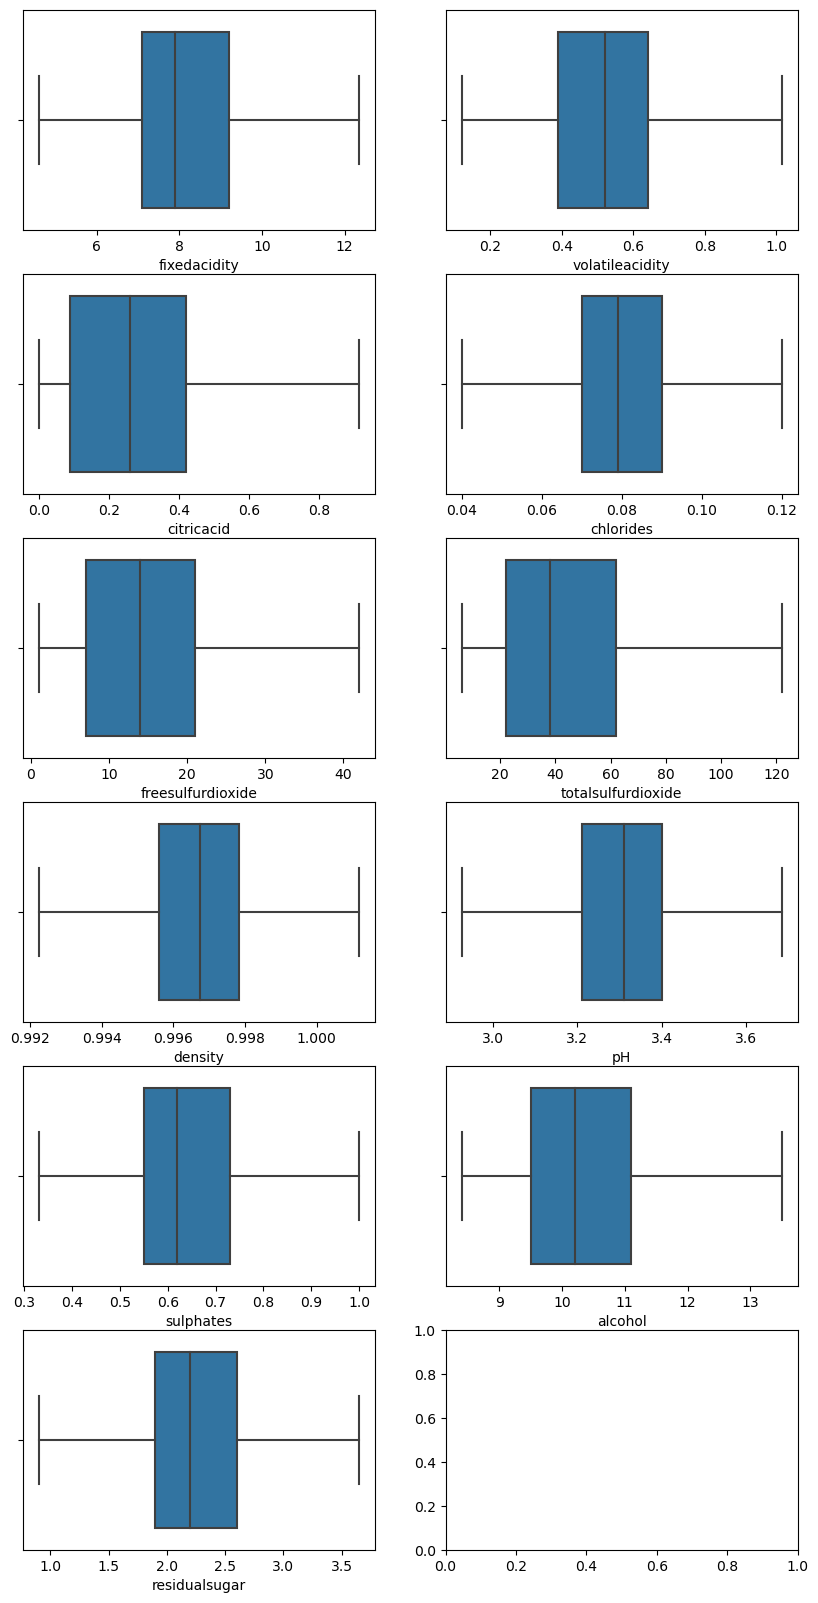

In [40]:
fig, axarr  = plt.subplots(6,2,figsize=(10,20))
sns.boxplot(x=data['fixedacidity'],ax=axarr[0,0])
sns.boxplot(x=data['volatileacidity'],ax=axarr[0,1])
sns.boxplot(x=data['citricacid'],ax=axarr[1,0])
sns.boxplot(x=data['chlorides'],ax=axarr[1,1])
sns.boxplot(x=data['freesulfurdioxide'],ax=axarr[2,0])
sns.boxplot(x=data['totalsulfurdioxide'],ax=axarr[2,1])
sns.boxplot(x=data['density'],ax=axarr[3,0])
sns.boxplot(x=data['pH'],ax=axarr[3,1])
sns.boxplot(x=data['sulphates'],ax=axarr[4,0])
sns.boxplot(x=data['alcohol'],ax=axarr[4,1])
sns.boxplot(x=data['residualsugar'],ax=axarr[5,0])

# statical test for continous data

In [41]:
data['quality']=data['quality'].astype("int")

In [42]:
data_numeric.columns

Index(['fixedacidity', 'volatileacidity', 'citricacid', 'residualsugar',
       'chlorides', 'freesulfurdioxide', 'totalsulfurdioxide', 'density', 'pH',
       'sulphates', 'alcohol'],
      dtype='object')

In [43]:
model = ols('quality~fixedacidity',data =data).fit()
anova = sm.stats.anova_lm(model)
anova.round(decimals=4)

,df,sum_sq,mean_sq,F,PR(>F)
fixedacidity,1.0,16.3991,16.3991,25.5316,0.0
Residual,1597.0,1025.7660,0.6423,NaN,NaN


In [44]:
model = ols('quality~volatileacidity',data =data).fit()
anova = sm.stats.anova_lm(model)
anova.round(decimals=4)

,df,sum_sq,mean_sq,F,PR(>F)
volatileacidity,1.0,156.5750,156.5750,282.3545,0.0
Residual,1597.0,885.5901,0.5545,NaN,NaN


In [45]:
model = ols('quality~citricacid',data =data).fit()
anova = sm.stats.anova_lm(model)
anova.round(decimals=4)

,df,sum_sq,mean_sq,F,PR(>F)
citricacid,1.0,53.7701,53.7701,86.879,0.0
Residual,1597.0,988.3950,0.6189,NaN,NaN


In [46]:
model = ols('quality~residualsugar',data =data).fit()
anova = sm.stats.anova_lm(model)
anova.round(decimals=4)

,df,sum_sq,mean_sq,F,PR(>F)
residualsugar,1.0,0.5898,0.5898,0.9044,0.3418
Residual,1597.0,1041.5753,0.6522,NaN,NaN


In [47]:
model = ols('quality~chlorides',data =data).fit()
anova = sm.stats.anova_lm(model)
anova.round(decimals=4)

,df,sum_sq,mean_sq,F,PR(>F)
chlorides,1.0,34.9151,34.9151,55.3581,0.0
Residual,1597.0,1007.2500,0.6307,NaN,NaN


In [48]:
model = ols('quality~freesulfurdioxide',data =data).fit()
anova = sm.stats.anova_lm(model)
anova.round(decimals=4)

,df,sum_sq,mean_sq,F,PR(>F)
freesulfurdioxide,1.0,2.6726,2.6726,4.106,0.0429
Residual,1597.0,1039.4925,0.6509,NaN,NaN


In [49]:
model = ols('quality~totalsulfurdioxide',data =data).fit()
anova = sm.stats.anova_lm(model)
anova.round(decimals=4)

,df,sum_sq,mean_sq,F,PR(>F)
totalsulfurdioxide,1.0,42.3321,42.3321,67.6156,0.0
Residual,1597.0,999.8330,0.6261,NaN,NaN


In [50]:
model = ols('quality~density',data =data).fit()
anova = sm.stats.anova_lm(model)
anova.round(decimals=4)

,df,sum_sq,mean_sq,F,PR(>F)
density,1.0,32.4033,32.4033,51.2478,0.0
Residual,1597.0,1009.7618,0.6323,NaN,NaN


In [51]:
model = ols('quality~density',data =data).fit()
anova = sm.stats.anova_lm(model)
anova.round(decimals=4)

,df,sum_sq,mean_sq,F,PR(>F)
density,1.0,32.4033,32.4033,51.2478,0.0
Residual,1597.0,1009.7618,0.6323,NaN,NaN


In [52]:
model = ols('quality~pH',data =data).fit()
anova = sm.stats.anova_lm(model)
anova.round(decimals=4)

,df,sum_sq,mean_sq,F,PR(>F)
pH,1.0,3.9426,3.9426,6.0646,0.0139
Residual,1597.0,1038.2225,0.6501,NaN,NaN


In [53]:
model = ols('quality~sulphates',data =data).fit()
anova = sm.stats.anova_lm(model)
anova.round(decimals=4)

,df,sum_sq,mean_sq,F,PR(>F)
sulphates,1.0,112.6065,112.6065,193.4601,0.0
Residual,1597.0,929.5586,0.5821,NaN,NaN


In [54]:
model = ols('quality~alcohol',data =data).fit()
anova = sm.stats.anova_lm(model)
anova.round(decimals=4)

,df,sum_sq,mean_sq,F,PR(>F)
alcohol,1.0,238.6726,238.6726,474.3793,0.0
Residual,1597.0,803.4925,0.5031,NaN,NaN


In [55]:
#data['quality']=data['quality'].astype("object")

# multicolinearity

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 1599 entries, 0 to 1598

Data columns (total 12 columns):

 #   Column              Non-Null Count  Dtype  

---  ------              --------------  -----  

 0   fixedacidity        1599 non-null   float64

 1   volatileacidity     1599 non-null   float64

 2   citricacid          1599 non-null   float64

 3   residualsugar       1599 non-null   float64

 4   chlorides           1599 non-null   float64

 5   freesulfurdioxide   1599 non-null   float64

 6   totalsulfurdioxide  1599 non-null   float64

 7   density             1599 non-null   float64

 8   pH                  1599 non-null   float64

 9   sulphates           1599 non-null   float64

 10  alcohol             1599 non-null   float64

 11  quality             1599 non-null   int32  

dtypes: float64(11), int32(1)

memory usage: 143.8 KB


In [57]:
x=data.iloc[:,[0,1,2,3,4,5,6,7,8,9,10]]
x['intersept']=1
vif_data=pd.DataFrame()
vif_data["feature"]=x.columns

In [58]:
vif_data["VIF"]=[variance_inflation_factor(x.values,i)
                    for i in range(len(x.columns))]
print(vif_data)

               feature           VIF

0         fixedacidity  7.203528e+00

1      volatileacidity  1.769959e+00

2           citricacid  2.984532e+00

3        residualsugar  1.928479e+00

4            chlorides  1.334310e+00

5    freesulfurdioxide  2.050753e+00

6   totalsulfurdioxide  2.335711e+00

7              density  7.083823e+00

8                   pH  3.154113e+00

9            sulphates  1.309451e+00

10             alcohol  3.382952e+00

11           intersept  2.089003e+06


<AxesSubplot:>

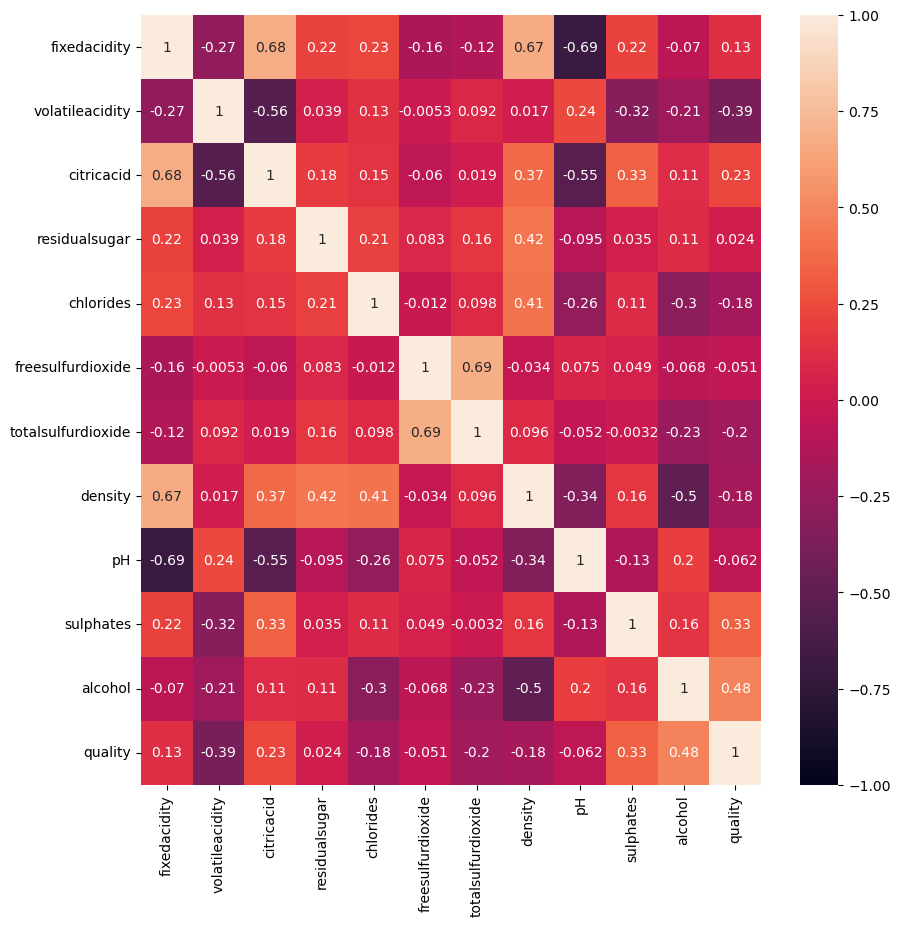

In [59]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, vmin= -1, vmax=1)

In [60]:
data.corr()['quality'].sort_values()

volatileacidity      -0.387608
totalsulfurdioxide   -0.201542
chlorides            -0.183037
density              -0.176330
pH                   -0.061507
freesulfurdioxide    -0.050641
residualsugar         0.023790
fixedacidity          0.125442
citricacid            0.227144
sulphates             0.328710
alcohol               0.478556
quality               1.000000
Name: quality, dtype: float64

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

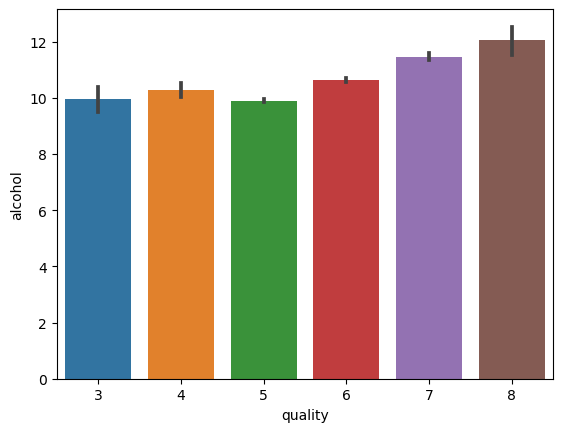

In [61]:
sns.barplot(data["quality"],data["alcohol"])

In [62]:
data.cov()

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality
fixedacidity,2.741871,-0.077280,0.218714,0.217076,0.006743,-2.558806,-6.009543,0.001998,-0.171168,0.048848,-0.122686,0.167744
volatileacidity,-0.077280,0.030292,-0.018994,0.004182,0.000413,-0.009053,0.484150,0.000005,0.006138,-0.007544,-0.038440,-0.054480
citricacid,0.218714,-0.018994,0.037874,0.021772,0.000512,-0.115139,0.113952,0.000130,-0.015923,0.008895,0.022918,0.035699
residualsugar,0.217076,0.004182,0.021772,0.371482,0.002265,0.497254,2.911136,0.000467,-0.008639,0.002924,0.068864,0.011710
chlorides,0.006743,0.000413,0.000512,0.002265,0.000318,-0.002134,0.053081,0.000013,-0.000693,0.000263,-0.005557,-0.002634
freesulfurdioxide,-2.558806,-0.009053,-0.115139,0.497254,-0.002134,96.776297,205.333709,-0.000604,0.111174,0.066196,-0.706641,-0.402313
totalsulfurdioxide,-6.009543,0.484150,0.113952,2.911136,0.053081,205.333709,922.581639,0.005259,-0.236057,-0.013446,-7.332405,-4.943663
density,0.001998,0.000005,0.000130,0.000467,0.000013,-0.000604,0.005259,0.000003,-0.000091,0.000040,-0.000953,-0.000257
pH,-0.171168,0.006138,-0.015923,-0.008639,-0.000693,0.111174,-0.236057,-0.000091,0.022455,-0.002767,0.030854,-0.007443
sulphates,0.048848,-0.007544,0.008895,0.002924,0.000263,0.066196,-0.013446,0.000040,-0.002767,0.018793,0.022458,0.036390


In [63]:
data.corr()

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality
fixedacidity,1.000000,-0.268153,0.678704,0.215090,0.228484,-0.157083,-0.119486,0.668076,-0.689824,0.215195,-0.070242,0.125442
volatileacidity,-0.268153,1.000000,-0.560770,0.039427,0.133096,-0.005288,0.091583,0.017347,0.235347,-0.316181,-0.209385,-0.387608
citricacid,0.678704,-0.560770,1.000000,0.183553,0.147668,-0.060140,0.019277,0.369893,-0.546002,0.333402,0.111640,0.227144
residualsugar,0.215090,0.039427,0.183553,1.000000,0.208471,0.082933,0.157250,0.424354,-0.094584,0.034996,0.107114,0.023790
chlorides,0.228484,0.133096,0.147668,0.208471,1.000000,-0.012169,0.098054,0.407441,-0.259512,0.107645,-0.295608,-0.183037
freesulfurdioxide,-0.157083,-0.005288,-0.060140,0.082933,-0.012169,1.000000,0.687184,-0.034012,0.075415,0.049086,-0.068099,-0.050641
totalsulfurdioxide,-0.119486,0.091583,0.019277,0.157250,0.098054,0.687184,1.000000,0.095871,-0.051863,-0.003229,-0.228860,-0.201542
density,0.668076,0.017347,0.369893,0.424354,0.407441,-0.034012,0.095871,1.000000,-0.336870,0.161310,-0.500237,-0.176330
pH,-0.689824,0.235347,-0.546002,-0.094584,-0.259512,0.075415,-0.051863,-0.336870,1.000000,-0.134702,0.195196,-0.061507
sulphates,0.215195,-0.316181,0.333402,0.034996,0.107645,0.049086,-0.003229,0.161310,-0.134702,1.000000,0.155310,0.328710


# visulazation for categorical data

In [64]:
#data.describe(include=object)

In [65]:
data.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Text(0.5, 1.0, 'Barplot of quality')

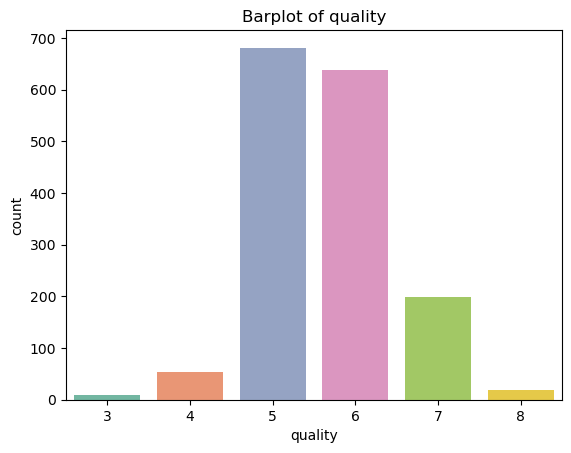

In [66]:
sns.countplot(x = 'quality', data=data, palette ='Set2')
plt.title('Barplot of quality')

# Logistic regression

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 1599 entries, 0 to 1598

Data columns (total 12 columns):

 #   Column              Non-Null Count  Dtype  

---  ------              --------------  -----  

 0   fixedacidity        1599 non-null   float64

 1   volatileacidity     1599 non-null   float64

 2   citricacid          1599 non-null   float64

 3   residualsugar       1599 non-null   float64

 4   chlorides           1599 non-null   float64

 5   freesulfurdioxide   1599 non-null   float64

 6   totalsulfurdioxide  1599 non-null   float64

 7   density             1599 non-null   float64

 8   pH                  1599 non-null   float64

 9   sulphates           1599 non-null   float64

 10  alcohol             1599 non-null   float64

 11  quality             1599 non-null   int32  

dtypes: float64(11), int32(1)

memory usage: 143.8 KB


In [68]:
data.columns

Index(['fixedacidity', 'volatileacidity', 'citricacid', 'residualsugar',
       'chlorides', 'freesulfurdioxide', 'totalsulfurdioxide', 'density', 'pH',
       'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [69]:
x=data.iloc[:,0:-1]
y=data.iloc[:,-1]

In [70]:
model=LogisticRegression()
model1=model.fit(x,y)

In [71]:
model1.intercept_

array([ 0.00078276,  0.03145295,  0.52464476, -0.08499878, -0.40464504,
       -0.06723666])

In [72]:
model1.coef_

array([[ 6.47382679e-02,  9.27585751e-02, -2.43765564e-02,
         4.79469800e-02,  5.32309624e-03,  5.51834711e-02,
        -5.47264605e-02,  1.31058693e-03,  2.74266951e-02,
        -2.16325619e-02, -1.75420005e-01],
       [-1.91089535e-01,  2.76545313e-01, -1.14582289e-01,
         2.23095044e-01,  1.53703271e-03, -6.11849392e-02,
         1.57494134e-02,  3.12640690e-02,  1.88873505e-01,
        -9.58975280e-02,  3.14414204e-03],
       [ 1.51962405e-01,  1.01540882e+00, -5.22295087e-01,
         7.22704033e-02,  7.48758708e-02, -9.47077335e-03,
         2.85177817e-02,  5.20905106e-01,  1.84130097e+00,
        -4.04761063e-01, -7.47825381e-01],
       [ 1.14158639e-01, -3.96657542e-01,  2.40129248e-02,
        -2.53598541e-01, -9.62577305e-03,  2.65812760e-02,
         8.44341882e-03, -8.33127265e-02, -2.73077373e-01,
         2.12621018e-01,  2.05969152e-01],
       [ 9.62556355e-02, -8.89189857e-01,  5.64119873e-01,
         1.32805278e-03, -6.02861588e-02,  5.18338050e-02,
  

In [73]:
y_pred=model1.predict(x)
y_pred

array([5, 5, 5, ..., 6, 5, 6])

In [74]:
cm=metrics=confusion_matrix(y,y_pred)
cm

array([[  0,   0,   9,   1,   0,   0],
       [  0,   0,  36,  17,   0,   0],
       [  0,   0, 519, 161,   1,   0],
       [  0,   0, 227, 404,   7,   0],
       [  0,   0,  14, 179,   6,   0],
       [  0,   0,   0,  16,   2,   0]], dtype=int64)

In [75]:
model1.score(x,y)

0.5809881175734835

In [76]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support



           3       0.00      0.00      0.00        10

           4       0.00      0.00      0.00        53

           5       0.64      0.76      0.70       681

           6       0.52      0.63      0.57       638

           7       0.38      0.03      0.06       199

           8       0.00      0.00      0.00        18



    accuracy                           0.58      1599

   macro avg       0.26      0.24      0.22      1599

weighted avg       0.53      0.58      0.53      1599




# LR -multiclass classification -solver-'liblinear',multiclass-'auto'

In [77]:
model2=LogisticRegression(solver="liblinear",random_state=42,multi_class='auto')
model2.fit(x,y)

LogisticRegression(random_state=42, solver='liblinear')

In [78]:
model2.intercept_

array([-0.03389537, -0.24478632,  1.7030722 , -0.65028488, -1.34441976,
       -0.67421768])

In [79]:
model2.coef_

array([[ 1.14569592e-01,  1.98239098e+00, -3.00625571e-01,
         4.50778200e-01,  1.26582298e-01,  8.75508876e-02,
        -8.43604094e-02, -3.03113120e-02,  6.49938967e-01,
        -4.10922529e-01, -8.20755469e-01],
       [-2.09754646e-01,  2.49344319e+00, -4.47773046e-02,
         3.15628238e-01, -1.21844651e-01, -3.02440804e-02,
        -9.83470222e-03, -2.47702233e-01,  3.03996388e-01,
        -1.32736086e+00, -2.63587565e-01],
       [ 1.34980345e-02,  1.65511744e+00,  5.68583948e-01,
        -2.58346707e-03,  6.89859820e-01, -2.72141687e-02,
         2.21473323e-02,  1.69100005e+00,  1.41914431e+00,
        -2.31027469e+00, -8.42901734e-01],
       [ 3.99361754e-02, -1.34745999e+00, -1.01609223e+00,
        -1.18903334e-01,  3.26234045e-02,  2.65020301e-02,
        -1.33190892e-02, -6.03422669e-01, -2.65579674e-01,
         9.69472769e-01,  2.09373772e-01],
       [-6.97398317e-02, -2.81435919e+00,  6.85431978e-02,
         2.00399842e-01, -6.03092646e-01,  2.64178567e-02,
  

In [80]:
y_pred=model2.predict(x)
y_pred

array([5, 5, 5, ..., 6, 6, 6])

In [81]:
model2.score(x,y)

0.5959974984365228

In [82]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support



           3       0.00      0.00      0.00        10

           4       0.00      0.00      0.00        53

           5       0.65      0.78      0.71       681

           6       0.54      0.63      0.58       638

           7       0.49      0.10      0.16       199

           8       0.00      0.00      0.00        18



    accuracy                           0.60      1599

   macro avg       0.28      0.25      0.24      1599

weighted avg       0.55      0.60      0.55      1599




In [83]:
cm=metrics=confusion_matrix(y,y_pred)
cm

array([[  0,   0,   9,   1,   0,   0],
       [  0,   0,  39,  14,   0,   0],
       [  0,   0, 530, 149,   2,   0],
       [  0,   0, 221, 404,  13,   0],
       [  0,   0,  12, 168,  19,   0],
       [  0,   0,   0,  13,   5,   0]], dtype=int64)

In [84]:
#LR -multiclass classification -solver-'newton-cg',multiclass-'ovr'

In [85]:
model3=LogisticRegression(solver="newton-cg",random_state=42,multi_class="ovr",max_iter=150)
model3.fit(x,y)

LogisticRegression(max_iter=150, multi_class='ovr', random_state=42,
                   solver='newton-cg')

In [86]:
model3.intercept_

array([ -1.19372959,  -3.81472052,   9.84004108,  -3.42235669,
       -12.06803028, -16.01838505])

In [87]:
model3.coef_

array([[ 0.13636588,  2.01035738, -0.31834453,  0.44720375,  0.13025016,
         0.08640802, -0.08297756,  0.0034546 ,  0.76633047, -0.40138275,
        -0.76874836],
       [-0.13155292,  2.55635731, -0.10850428,  0.30436165, -0.09928163,
        -0.03032367, -0.00860021, -0.00508055,  0.91784406, -1.28133837,
        -0.20718786],
       [-0.10508999,  1.56210818,  0.6196734 ,  0.02896524,  0.49497564,
        -0.02504743,  0.01991119,  0.01438751, -0.0081658 , -2.45953096,
        -0.90280494],
       [ 0.07801923, -1.30464636, -1.01526553, -0.1285931 ,  0.119272  ,
         0.02589121, -0.0126222 ,  0.03940289,  0.2223776 ,  1.00027799,
         0.22362572],
       [ 0.08921564, -2.57706138,  0.1355172 ,  0.17011172, -0.47764097,
         0.02500288, -0.02143515, -0.02343176, -0.36899316,  2.91223107,
         0.91050276],
       [ 0.08133612, -0.26835399,  0.58083136, -0.38198785, -0.10888984,
         0.0055154 , -0.01138486, -0.00389941, -0.70421294,  1.09508837,
         1.218

In [88]:
y_pred=model3.predict(x)
y_pred

array([5, 5, 5, ..., 6, 6, 6])

In [89]:
model3.score(x,y)

0.5941213258286429

In [90]:
cm=metrics=confusion_matrix(y,y_pred)
cm

array([[  0,   0,   9,   1,   0,   0],
       [  0,   0,  36,  17,   0,   0],
       [  0,   0, 537, 142,   2,   0],
       [  0,   0, 234, 389,  15,   0],
       [  0,   0,  15, 160,  24,   0],
       [  0,   0,   0,  13,   5,   0]], dtype=int64)

In [91]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support



           3       0.00      0.00      0.00        10

           4       0.00      0.00      0.00        53

           5       0.65      0.79      0.71       681

           6       0.54      0.61      0.57       638

           7       0.52      0.12      0.20       199

           8       0.00      0.00      0.00        18



    accuracy                           0.59      1599

   macro avg       0.28      0.25      0.25      1599

weighted avg       0.56      0.59      0.56      1599




In [92]:
# Compute the ROC AUC score for each class
y_score =model3.predict_proba(x)
roc_auc = roc_auc_score(y, y_score, multi_class='ovr')
print("ROC AUC score: ", roc_auc)

ROC AUC score:  0.8205142271533555


In [93]:
# Compute the fpr and tpr for each class
from sklearn.preprocessing import LabelBinarizer
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(np.unique(y))
lb = LabelBinarizer()
y_binary = lb.fit_transform(y)
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_binary[:,i], y_score[:,i])
    roc_auc[i] = roc_auc_score(y_binary[:,i], y_score[:,i])

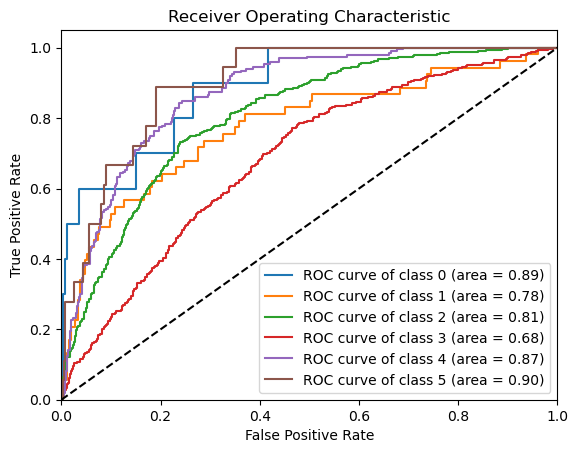

In [94]:
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [95]:
#LR -multiclass classification -solver-'lbfgd',multiclass-'multinomial'

In [96]:
model4=LogisticRegression(solver="lbfgs",random_state=42,multi_class="multinomial",max_iter=150)
model4.fit(x,y)

LogisticRegression(max_iter=150, multi_class='multinomial', random_state=42)

In [97]:
model4.intercept_

array([ 0.00347287,  0.04726154,  0.60754656, -0.03631686, -0.51929215,
       -0.10267197])

In [98]:
model4.coef_

array([[ 1.02133007e-01,  1.48402261e-01, -3.91481315e-02,
         7.62033287e-02,  8.55294827e-03,  1.78667693e-02,
        -3.32328125e-02,  4.19874311e-03,  5.18763256e-02,
        -3.34017023e-02, -2.50869767e-01],
       [-7.22018400e-02,  4.24838012e-01, -1.62083873e-01,
         2.90863360e-01,  2.83434466e-03, -5.09198655e-02,
         1.46335539e-02,  4.67327023e-02,  2.69895456e-01,
        -1.49046644e-01, -1.38214266e-01],
       [ 1.70384010e-01,  1.14142291e+00, -5.04501524e-01,
        -1.73557316e-01,  9.06267475e-02, -1.64790980e-02,
         3.09397294e-02,  5.94717613e-01,  1.99128620e+00,
        -6.00311598e-01, -7.69329968e-01],
       [ 2.53957389e-02, -3.83053246e-01, -1.20301308e-01,
        -3.10693935e-02, -1.16983575e-03,  1.54845141e-02,
         8.27560576e-03, -3.22925393e-02, -1.23160954e-02,
         2.89363438e-01,  1.51446131e-01],
       [-7.34221990e-03, -1.17724076e+00,  7.03195961e-01,
        -2.89507400e-02, -8.30587725e-02,  2.59892100e-02,
  

In [99]:
y_pred=model4.predict(x)
y_pred

array([5, 5, 5, ..., 6, 6, 6])

In [100]:
model4.score(x,y)

0.5928705440900562

In [101]:
cm=metrics=confusion_matrix(y,y_pred)
cm

array([[  0,   0,   9,   1,   0,   0],
       [  0,   0,  31,  22,   0,   0],
       [  0,   0, 520, 157,   4,   0],
       [  0,   0, 217, 395,  26,   0],
       [  0,   0,  11, 155,  33,   0],
       [  0,   0,   0,  12,   6,   0]], dtype=int64)

In [102]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support



           3       0.00      0.00      0.00        10

           4       0.00      0.00      0.00        53

           5       0.66      0.76      0.71       681

           6       0.53      0.62      0.57       638

           7       0.48      0.17      0.25       199

           8       0.00      0.00      0.00        18



    accuracy                           0.59      1599

   macro avg       0.28      0.26      0.25      1599

weighted avg       0.55      0.59      0.56      1599




# logistic regression-multiclass using target value transformation

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

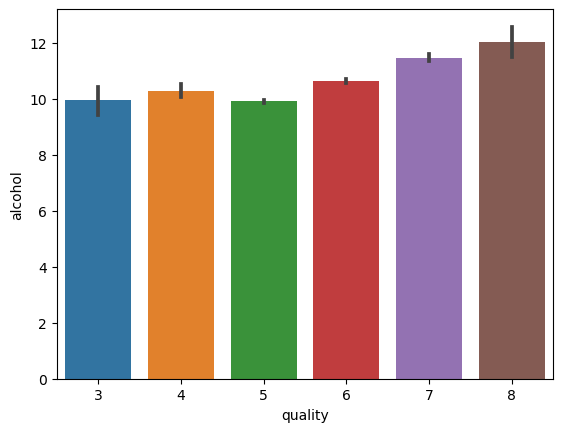

In [103]:
sns.barplot(data["quality"],data["alcohol"])

In [104]:
#data["quality"]=data["quality"].apply(lambda x:1 if x>=7 else 0)

In [105]:
data["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [106]:
x1=data.drop("quality",axis=1)
y1=data['quality']

In [107]:
x_train, x_test, y_train, y_test = train_test_split(x1,y1, test_size = 0.2, random_state = 42)

In [108]:
print (x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1279, 11) (320, 11) (1279,) (320,)


In [109]:
model5=LogisticRegression()
model5.fit(x_train,y_train)

LogisticRegression()

In [110]:
model5.intercept_

array([-0.00350596,  0.02621919,  0.49840882, -0.09280366, -0.37026001,
       -0.05805838])

In [111]:
model5.coef_

array([[ 8.95487271e-02,  9.53580897e-02, -2.14932307e-02,
         5.54378062e-02,  5.60160016e-03,  7.75803992e-02,
        -4.67728352e-02, -2.86616543e-03,  8.41219529e-03,
        -2.76925184e-02, -2.19870100e-01],
       [-2.76020698e-01,  1.92963192e-01, -8.71818295e-02,
         2.50612593e-01,  2.64880042e-03, -3.57152529e-02,
         1.40136119e-02,  2.58771456e-02,  1.52339138e-01,
        -8.77802396e-02,  4.57369174e-02],
       [ 1.29256982e-01,  9.73928061e-01, -5.31501399e-01,
         6.19326131e-02,  6.33684466e-02, -4.22188410e-02,
         3.44532089e-02,  4.94856256e-01,  1.75631759e+00,
        -3.79822637e-01, -6.82069154e-01],
       [ 6.37979985e-02, -3.61252657e-01,  5.51959130e-02,
        -3.71382825e-01, -9.19968399e-03,  2.14904309e-03,
         1.45180145e-02, -9.13024549e-02, -2.91715819e-01,
         2.21837231e-01,  2.74947880e-01],
       [-2.86501377e-04, -8.18855568e-01,  5.13509654e-01,
         7.08168927e-02, -5.29748658e-02,  1.42177125e-02,
  

In [112]:
model5.score(x1,y1)

0.5734834271419638

In [113]:
y_pred=model5.predict(x_test)
y_pred

array([5, 5, 5, 6, 6, 5, 5, 5, 6, 6, 6, 5, 5, 5, 5, 6, 5, 5, 6, 5, 5, 5,
       6, 6, 5, 5, 6, 5, 5, 5, 5, 5, 6, 5, 5, 5, 6, 6, 6, 6, 5, 5, 6, 5,
       6, 6, 6, 5, 5, 6, 5, 5, 6, 6, 5, 5, 6, 5, 6, 5, 5, 6, 5, 5, 6, 5,
       6, 5, 6, 5, 6, 5, 6, 6, 6, 5, 6, 6, 6, 6, 5, 6, 6, 5, 5, 6, 5, 6,
       6, 5, 6, 5, 6, 6, 5, 6, 5, 6, 5, 6, 5, 5, 6, 5, 6, 6, 6, 5, 6, 5,
       6, 5, 6, 5, 6, 6, 6, 5, 5, 6, 6, 5, 5, 5, 5, 5, 6, 5, 5, 6, 6, 5,
       5, 6, 6, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 5, 6, 5, 6, 5, 6, 6, 5, 6,
       6, 6, 5, 6, 5, 6, 6, 6, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 6, 6,
       6, 5, 5, 5, 5, 6, 5, 7, 5, 6, 5, 6, 6, 5, 5, 6, 6, 6, 6, 5, 5, 5,
       5, 6, 5, 5, 5, 5, 6, 6, 5, 5, 5, 6, 6, 5, 6, 6, 6, 6, 5, 5, 6, 5,
       5, 6, 6, 6, 6, 5, 5, 6, 5, 5, 5, 5, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5,
       6, 6, 6, 5, 6, 5, 6, 5, 6, 6, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 5, 7,
       6, 6, 5, 5, 6, 6, 6, 6, 5, 5, 5, 6, 6, 6, 6, 5, 6, 5, 5, 5, 5, 6,
       5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 6, 6, 6,

In [114]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support



           3       0.00      0.00      0.00         1

           4       0.00      0.00      0.00        10

           5       0.59      0.72      0.65       130

           6       0.49      0.59      0.54       132

           7       0.50      0.02      0.05        42

           8       0.00      0.00      0.00         5



    accuracy                           0.54       320

   macro avg       0.26      0.22      0.21       320

weighted avg       0.51      0.54      0.49       320




In [115]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 0,  0,  1,  0,  0,  0],
       [ 0,  0,  8,  2,  0,  0],
       [ 0,  0, 94, 36,  0,  0],
       [ 0,  0, 53, 78,  1,  0],
       [ 0,  0,  3, 38,  1,  0],
       [ 0,  0,  0,  5,  0,  0]], dtype=int64)

In [116]:
#smote 

In [117]:
data.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [118]:
quality5=data[data.quality==5]
quality6=data[data.quality==6]
quality7=data[data.quality==7]
quality4=data[data.quality==4]
quality8=data[data.quality==8]
quality3=data[data.quality==3]

In [119]:
from sklearn.utils import resample

In [120]:
quality_oversample=resample(quality6,
                           replace=True,n_samples=len(quality5),
                           random_state=682)

In [121]:
quality_oversample1=resample(quality7,
                           replace=True,n_samples=len(quality5),
                           random_state=682)

In [122]:
quality_oversample2=resample(quality4,
                           replace=True,n_samples=len(quality5),
                           random_state=682)

In [123]:
quality_oversample3=resample(quality8,
                           replace=True,n_samples=len(quality5),
                           random_state=682)

In [124]:
quality_oversample4=resample(quality3,
                           replace=True,n_samples=len(quality5),
                           random_state=682)

In [125]:
datasmote=pd.concat([quality5,quality_oversample,quality_oversample1,quality_oversample2,quality_oversample3,quality_oversample4])

In [126]:
datasmote.quality.value_counts()

5    681
6    681
7    681
4    681
8    681
3    681
Name: quality, dtype: int64

In [127]:
x2=datasmote.iloc[:,0:-1]
y2=datasmote.iloc[:,-1]

In [128]:
y2.value_counts()

5    681
6    681
7    681
4    681
8    681
3    681
Name: quality, dtype: int64

In [129]:
model6=LogisticRegression(solver="liblinear",random_state=42,multi_class="auto",max_iter=150)
model6.fit(x2,y2)

LogisticRegression(max_iter=150, random_state=42, solver='liblinear')

In [130]:
model6.intercept_

array([-1.89843397,  0.35801178,  2.86387275,  0.08112534, -1.87890224,
       -0.28809173])

In [131]:
model6.coef_

array([[ 4.73052297e-01,  9.40393086e+00,  2.55194427e+00,
         1.81294445e-01,  2.38272363e+00,  1.73162735e-01,
        -1.12499887e-01, -1.80300871e+00,  3.64627967e+00,
        -3.87014216e-01, -1.98791844e+00],
       [-9.18735338e-02,  7.62540401e-01, -3.16476310e-01,
         5.98753365e-02, -2.29349307e+00, -2.11316134e-02,
         4.58498834e-03,  2.91127194e-01,  1.45614229e+00,
        -2.56133611e+00, -4.81556567e-01],
       [-4.23763520e-02, -1.62829416e+00, -1.15167613e+00,
         1.15453188e-01,  1.35783000e+00, -2.59010499e-02,
         3.12911188e-02,  2.87582990e+00,  6.16974233e-01,
        -1.84276586e+00, -7.69842526e-01],
       [ 1.07229117e-01, -2.85690424e+00, -2.35842493e+00,
        -5.29260586e-03, -7.06240300e-02,  8.03581486e-03,
         3.30041843e-03,  1.30819125e-01,  5.63000701e-02,
         2.54555255e-01, -1.04084560e-01],
       [ 4.51081313e-02, -4.77829655e+00, -9.16170065e-01,
         1.69261481e-01, -1.04005550e-01,  1.91311726e-02,
  

In [132]:
y_pred2= model6.predict(x2)
y_pred2

array([4, 5, 5, ..., 3, 3, 3])

In [133]:
model6.score(x2,y2)

0.5379344101811062

In [134]:
y2.shape

(4086,)

In [135]:
y_pred2

array([4, 5, 5, ..., 3, 3, 3])

In [136]:
#cm2=metrics.confusion_matrix(y2,y_pred2)
#cm2

In [137]:
print(classification_report(y2,y_pred2))

              precision    recall  f1-score   support



           3       0.64      1.00      0.78       681

           4       0.44      0.24      0.31       681

           5       0.46      0.52      0.49       681

           6       0.45      0.23      0.30       681

           7       0.46      0.34      0.39       681

           8       0.59      0.89      0.71       681



    accuracy                           0.54      4086

   macro avg       0.51      0.54      0.50      4086

weighted avg       0.51      0.54      0.50      4086




In [138]:
# multiclass classification- using over sampling method-smote

In [139]:
x3=data.iloc[:,0:-1]
y3=data.iloc[:,-1]

In [140]:
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
x_res,y_res=oversample.fit_resample(x3,y3)

In [141]:
x_res.shape,y_res.shape

((4086, 11), (4086,))

In [142]:
y.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [143]:
y_res.value_counts()

5    681
6    681
7    681
4    681
8    681
3    681
Name: quality, dtype: int64

In [144]:
x_train, x_test, y_train, y_test = train_test_split(x_res,y_res, test_size = 0.2, random_state = 42)

In [145]:
model7=LogisticRegression(solver="liblinear",random_state=42,multi_class="auto",max_iter=150)
model7.fit(x_train,y_train)

LogisticRegression(max_iter=150, random_state=42, solver='liblinear')

In [146]:
model7.intercept_

array([-1.4472456 ,  0.75982716,  2.59248901,  0.17966923, -2.06092778,
        0.046426  ])

In [147]:
model7.coef_

array([[ 6.08159483e-01,  9.87510619e+00,  1.55640851e+00,
         3.61453868e-01,  1.87762811e+00,  1.80739502e-01,
        -1.26159314e-01, -1.38560858e+00,  4.16467324e+00,
        -6.69583640e-01, -2.37544867e+00],
       [-2.47955071e-01,  1.63065865e+00,  3.03606439e-01,
         1.84260818e-01, -1.97508066e+00, -7.95449129e-03,
         2.57210629e-03,  7.14907528e-01,  1.13996085e+00,
        -2.55094392e+00, -4.43310802e-01],
       [ 2.49130246e-02, -1.81289359e+00, -1.43367265e+00,
         2.69415197e-03,  7.06652064e-01, -2.49856023e-02,
         3.33332941e-02,  2.60068619e+00,  9.63339997e-01,
        -1.57944767e+00, -8.60526585e-01],
       [ 6.61532160e-02, -3.75884403e+00, -2.34792491e+00,
        -1.13577102e-01,  3.27537272e-01,  1.01365584e-02,
         3.14065495e-03,  2.55233540e-01,  5.92591782e-01,
         4.86747004e-01, -2.14537169e-01],
       [ 1.06949826e-01, -4.94392086e+00, -1.56475513e+00,
         1.68569768e-01, -3.54238952e-01,  1.70606808e-02,
  

In [148]:
y_pred=model7.predict(x_res)
y_pred

array([5, 5, 5, ..., 8, 8, 8])

In [149]:
model7.score(x_res,y_res)

0.5783162016642193

In [150]:
#cm2=metrics.confusion_matrix(y_res,y_pred)
#cm2

In [151]:
print(classification_report(y_res,y_pred))

              precision    recall  f1-score   support



           3       0.68      1.00      0.81       681

           4       0.56      0.40      0.46       681

           5       0.50      0.53      0.52       681

           6       0.51      0.27      0.35       681

           7       0.51      0.44      0.48       681

           8       0.60      0.83      0.70       681



    accuracy                           0.58      4086

   macro avg       0.56      0.58      0.55      4086

weighted avg       0.56      0.58      0.55      4086




In [152]:
#multiclass classification- using under sampling method-smote

In [153]:
from imblearn.under_sampling import NearMiss
undersample=NearMiss()
x_res1,y_res1=undersample.fit_resample(x,y)

In [154]:
x_res1.shape,y_res1.shape

((60, 11), (60,))

In [155]:
y.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [156]:
y_res1.value_counts()

3    10
4    10
5    10
6    10
7    10
8    10
Name: quality, dtype: int64

In [157]:
x_train, x_test, y_train, y_test = train_test_split(x_res1,y_res1, test_size = 0.2, random_state = 42)

In [158]:
model8=LogisticRegression(solver="liblinear",random_state=42,multi_class="auto",max_iter=150)
model8.fit(x_train,y_train)

LogisticRegression(max_iter=150, random_state=42, solver='liblinear')

In [159]:
model8.intercept_

array([ 0.05920207,  0.06436519,  0.23916593, -0.01432772, -0.01053062,
       -0.39637498])

In [160]:
model8.coef_

array([[ 0.31880013,  0.91015267, -0.37663089,  0.60182107,  0.03604018,
         0.26131171,  0.03115099,  0.06204904,  0.50213373, -0.21014594,
        -0.95395076],
       [-0.89446856,  0.65174085, -0.67819283, -0.17658537, -0.02478416,
        -0.38569204,  0.03725358,  0.06550066,  0.66421761, -0.0321441 ,
         0.40751543],
       [ 0.18280245,  0.49031588, -0.77733523,  0.02561062,  0.019068  ,
         0.15269394, -0.19141894,  0.2384929 ,  0.8790439 , -0.52055754,
        -0.41195559],
       [-0.27416228, -0.35489214,  0.78823789, -0.04751394,  0.01083943,
        -0.34280362, -0.17943133, -0.01590768, -0.48616147,  0.02544448,
         0.58894774],
       [ 0.31080084, -0.8172171 ,  0.39597683,  0.45692716,  0.01443919,
         0.36945884, -1.02213636, -0.01203454, -0.2469032 ,  0.43750504,
         0.54177699],
       [ 0.3374728 , -0.9423701 ,  0.61803029, -0.87984201, -0.07058995,
        -0.83634503,  0.40616697, -0.39682077, -1.56976443,  0.24953654,
         0.234

In [161]:
y_pred=model8.predict(x_res1)
y_pred

array([8, 3, 5, 3, 5, 7, 3, 3, 4, 5, 5, 4, 5, 7, 4, 5, 4, 5, 4, 4, 4, 4,
       5, 5, 4, 3, 5, 3, 5, 5, 6, 6, 5, 6, 6, 7, 7, 7, 6, 8, 7, 7, 6, 5,
       7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 7, 8, 8, 6, 8, 8])

In [162]:
model8.score(x_res1,y_res1)

0.5666666666666667

In [163]:
#cm2=metrics.confusion_matrix(y_res1,y_pred)
#cm2

In [164]:
print(classification_report(y_res1,y_pred))

              precision    recall  f1-score   support



           3       0.67      0.40      0.50        10

           4       0.56      0.50      0.53        10

           5       0.36      0.50      0.42        10

           6       0.71      0.50      0.59        10

           7       0.53      0.80      0.64        10

           8       0.78      0.70      0.74        10



    accuracy                           0.57        60

   macro avg       0.60      0.57      0.57        60

weighted avg       0.60      0.57      0.57        60




In [165]:
#multiclass logistic regression USING MinMaxscaler-ovr

In [166]:
from sklearn.preprocessing import MinMaxScaler

In [167]:
data.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 1599 entries, 0 to 1598

Data columns (total 12 columns):

 #   Column              Non-Null Count  Dtype  

---  ------              --------------  -----  

 0   fixedacidity        1599 non-null   float64

 1   volatileacidity     1599 non-null   float64

 2   citricacid          1599 non-null   float64

 3   residualsugar       1599 non-null   float64

 4   chlorides           1599 non-null   float64

 5   freesulfurdioxide   1599 non-null   float64

 6   totalsulfurdioxide  1599 non-null   float64

 7   density             1599 non-null   float64

 8   pH                  1599 non-null   float64

 9   sulphates           1599 non-null   float64

 10  alcohol             1599 non-null   float64

 11  quality             1599 non-null   int32  

dtypes: float64(11), int32(1)

memory usage: 143.8 KB


In [168]:
data.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

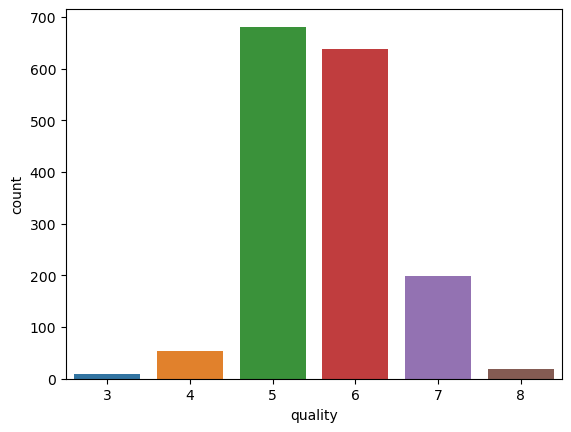

In [169]:
sns.countplot("quality",data=data)

In [170]:
x4=data.iloc[:,0:-1]
y4=data.iloc[:,-1]

In [171]:
scaler=MinMaxScaler()
X=scaler.fit_transform(x4)

In [172]:
model9=LogisticRegression(solver="liblinear",random_state=42,multi_class="ovr",max_iter=150)

In [173]:
model9.fit(X,y4)

LogisticRegression(max_iter=150, multi_class='ovr', random_state=42,
                   solver='liblinear')

In [174]:
model9.intercept_

array([-2.63531215, -2.20774647,  0.75371018, -0.37815628, -2.69923546,
       -2.28258805])

In [175]:
model9.coef_

array([[-5.97698364e-01,  9.54537401e-01, -7.42707044e-01,
        -5.17513033e-01,  3.25462866e-01, -9.17888061e-01,
        -1.43084030e+00, -2.28454787e-01, -4.58161916e-01,
        -1.38251872e+00, -1.29760925e+00],
       [-6.93033162e-01,  1.99953786e+00, -3.31809767e-01,
         4.59060920e-01, -5.88223718e-01, -1.05428654e+00,
        -8.44261229e-01, -4.19345064e-01,  3.68152461e-01,
        -1.65466332e+00, -1.01975600e+00],
       [-1.15479386e+00,  1.36102413e+00,  5.05858578e-01,
        -3.10156290e-01,  6.31563757e-01, -7.14399532e-01,
         2.08243377e+00,  8.51194398e-01, -1.44638758e-01,
        -2.03719045e+00, -3.54437489e+00],
       [-6.64738900e-02, -1.34767630e+00, -1.04525574e+00,
        -6.09744303e-01, -2.30262249e-03,  9.06194066e-01,
        -1.33622419e+00,  9.67674351e-01, -1.10264900e-01,
         6.21851809e-01,  1.54887340e+00],
       [ 8.80149730e-01, -2.41959204e+00,  2.62585646e-01,
         1.03197106e+00, -9.86722729e-01,  2.36481521e-01,
  

In [176]:
model9.score(X,y4)

0.6010006253908693

In [177]:
y_pred=model9.predict(X)
y_pred

array([5, 5, 5, ..., 6, 6, 6])

In [178]:
confusion_matrix(y4,y_pred)

array([[  0,   0,   9,   1,   0,   0],
       [  0,   0,  39,  13,   1,   0],
       [  0,   0, 540, 140,   1,   0],
       [  0,   0, 230, 397,  11,   0],
       [  0,   0,  12, 163,  24,   0],
       [  0,   0,   0,  14,   4,   0]], dtype=int64)

In [179]:
#cm2=metrics.confusion_matrix(y,y_pred)
#cm2

In [180]:
print(classification_report(y4,y_pred))

              precision    recall  f1-score   support



           3       0.00      0.00      0.00        10

           4       0.00      0.00      0.00        53

           5       0.65      0.79      0.71       681

           6       0.55      0.62      0.58       638

           7       0.59      0.12      0.20       199

           8       0.00      0.00      0.00        18



    accuracy                           0.60      1599

   macro avg       0.30      0.26      0.25      1599

weighted avg       0.57      0.60      0.56      1599




In [181]:
#multiclass logistic regression USING MinMaxscaler-multinomial

In [182]:
model10=LogisticRegression(solver="lbfgs",random_state=42,multi_class="multinomial",max_iter=150)

In [183]:
model10.fit(X,y4)

LogisticRegression(max_iter=150, multi_class='multinomial', random_state=42)

In [184]:
model10.intercept_

array([-3.36323114, -0.42572821,  3.48385659,  2.67571824, -0.38377804,
       -1.98683744])

In [185]:
model10.coef_

array([[ 0.25110926,  1.99041798, -0.35836492, -0.02031014,  1.22810617,
        -0.28747227, -0.74586462,  0.62877896,  0.69210939, -0.73098033,
        -0.82387979],
       [-0.25993264,  2.17109581, -0.13491514,  0.3471629 , -0.08627101,
        -0.62919889,  0.06349516, -0.00633594,  0.79973628, -1.5619726 ,
        -1.33100436],
       [-1.05970248,  0.39301488,  0.16147334, -0.48061181,  0.57017124,
        -0.25104971,  1.9844257 ,  0.88750102, -0.26295214, -1.70233224,
        -3.12327006],
       [-0.19772362, -1.43965387, -0.8249522 , -0.56118187,  0.10729535,
         0.64881721,  0.05766439,  0.7907232 , -0.27763517,  0.17485314,
         0.47825775],
       [ 1.06265184, -2.47612639,  0.19759445,  0.69050712, -0.7168389 ,
         0.60628873, -1.03907826, -1.16103979, -0.161067  ,  2.22991284,
         2.46138783],
       [ 0.20359765, -0.6387484 ,  0.95916448,  0.0244338 , -1.10246286,
        -0.08738508, -0.32064237, -1.13962746, -0.79019136,  1.59051919,
         2.338

In [186]:
model10.score(X,y4)

0.6047529706066291

In [187]:
y_pred=model10.predict(X)
y_pred

array([5, 5, 5, ..., 6, 6, 6])

In [188]:
print(classification_report(y4,y_pred))

              precision    recall  f1-score   support



           3       0.00      0.00      0.00        10

           4       0.00      0.00      0.00        53

           5       0.66      0.76      0.71       681

           6       0.55      0.62      0.58       638

           7       0.54      0.28      0.37       199

           8       0.00      0.00      0.00        18



    accuracy                           0.60      1599

   macro avg       0.29      0.28      0.28      1599

weighted avg       0.57      0.60      0.58      1599




In [189]:
# DECISION TREE 

In [190]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [191]:
x5=data.iloc[:,0:-1]
y5=data.iloc[:,-1]

In [192]:
y5.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [193]:
x_train, x_test, y_train, y_test= train_test_split(x5,y5,test_size = 0.20, random_state = 1)

In [194]:
print (x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1279, 11) (320, 11) (1279,) (320,)


In [195]:
clf = tree.DecisionTreeClassifier(criterion="entropy",splitter="best",random_state=40)

In [196]:
model11=clf.fit(x_train,y_train)

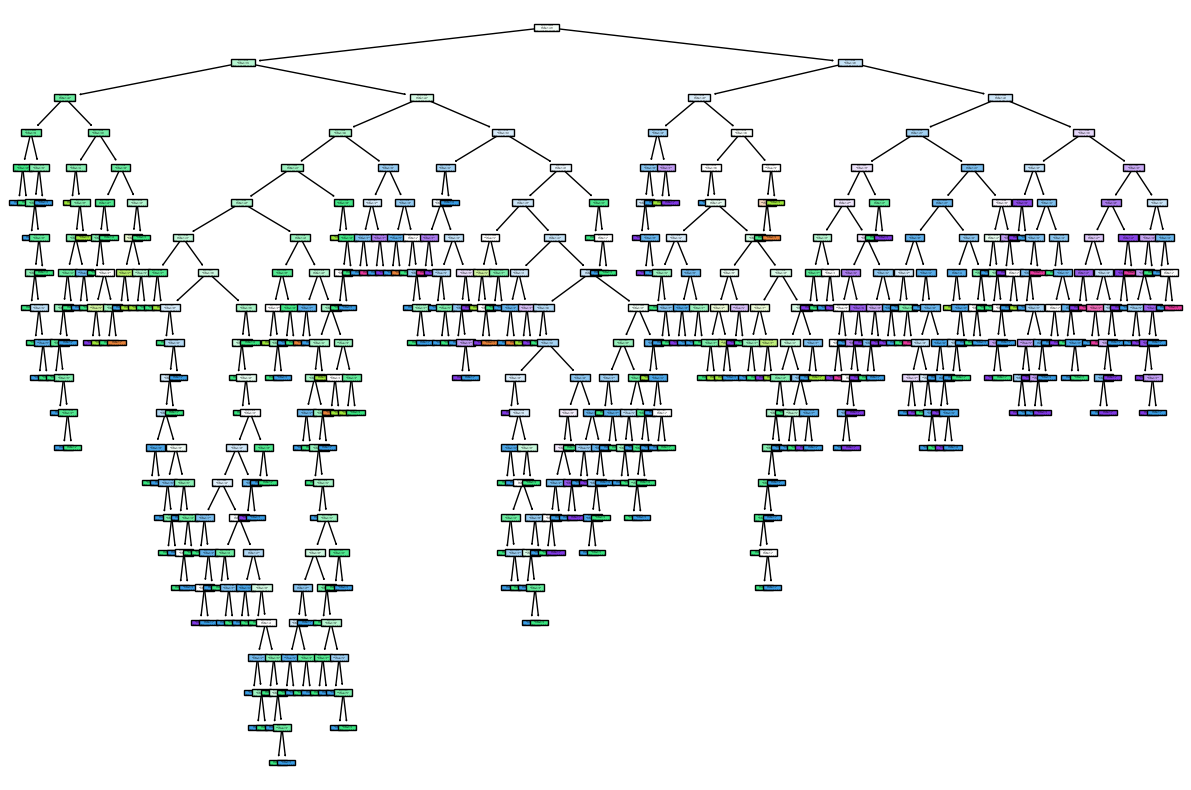

In [197]:
plt.figure(figsize=(15,10))
a = plot_tree(model11,filled=True)
plt.show()

In [198]:
model11.get_depth()

21

In [199]:
print(model11.feature_importances_)

[0.05755172 0.12011631 0.05583603 0.07682993 0.08180245 0.05293794

 0.10679233 0.04502703 0.08579993 0.12403651 0.19326982]


In [200]:
depth = [1,2,3,4,5,6,7,8]

accuracy_train,accuracy_test= [],[]

for i in depth:
    tree = DecisionTreeClassifier(max_depth= i, random_state=50)
    
    tree.fit(x_train, y_train)
    y_train_pred1=tree.predict(x_train)
    y_test_pred1=tree.predict(x_test)
    
    accuracy_train.append(accuracy_score(y_train, y_train_pred1))
    accuracy_test.append(accuracy_score(y_test, y_test_pred1))

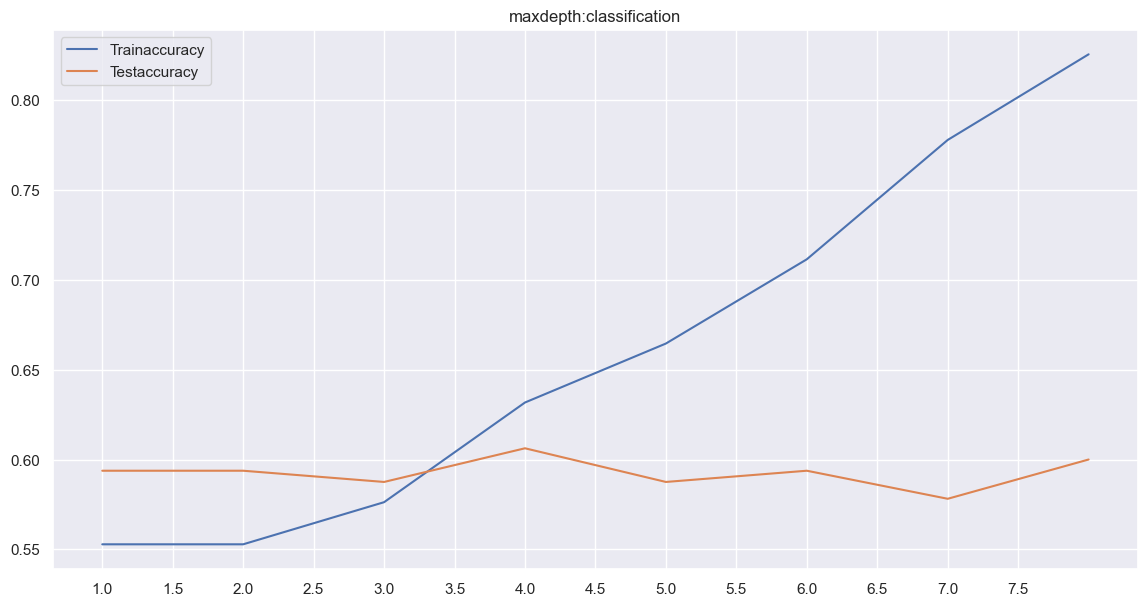

In [201]:
sns.set()
plt.figure(figsize = (14,7))
sns.lineplot(y=accuracy_train,x = depth, label = 'Trainaccuracy')
sns.lineplot(y=accuracy_test, x = depth, label = 'Testaccuracy')
plt.title("maxdepth:classification")
plt.xticks(ticks=np.arange(1,8,0.5))
plt.show()

In [202]:
model11= DecisionTreeClassifier(max_depth=3, random_state=50)    
model11.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=50)

In [203]:
y_train_pred2=model11.predict(x_train)
y_train

701     6
56      5
142     6
863     5
1387    5
       ..
715     6
905     5
1096    6
235     6
1061    8
Name: quality, Length: 1279, dtype: int32

In [204]:
y_test_pred2=model11.predict(x_test)
y_test_pred2

array([6, 5, 6, 6, 6, 5, 6, 5, 6, 5, 6, 5, 5, 6, 6, 5, 6, 6, 6, 5, 5, 5,
       5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 5, 5, 5, 7, 5, 6, 5, 5, 6,
       5, 5, 5, 5, 5, 5, 5, 6, 6, 5, 5, 6, 6, 6, 5, 5, 7, 5, 5, 5, 5, 6,
       7, 6, 5, 7, 5, 6, 5, 6, 6, 5, 6, 5, 5, 6, 6, 5, 5, 5, 6, 5, 5, 6,
       5, 5, 5, 6, 5, 7, 6, 5, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 6, 6, 5,
       7, 5, 6, 6, 5, 7, 5, 5, 5, 5, 5, 7, 6, 5, 5, 5, 6, 5, 6, 5, 6, 5,
       6, 5, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 6, 6, 6, 5, 6, 6, 5, 7, 5, 5,
       6, 6, 6, 6, 6, 5, 6, 5, 5, 5, 6, 6, 5, 5, 5, 6, 5, 6, 5, 5, 6, 5,
       5, 5, 5, 5, 6, 6, 5, 5, 6, 6, 6, 5, 6, 5, 6, 5, 5, 5, 6, 5, 5, 5,
       5, 5, 6, 6, 6, 5, 7, 6, 5, 5, 6, 5, 5, 6, 5, 6, 5, 5, 5, 5, 6, 6,
       5, 5, 6, 5, 6, 6, 5, 5, 7, 6, 6, 5, 6, 6, 5, 5, 6, 5, 6, 6, 6, 6,
       6, 5, 5, 7, 6, 5, 5, 5, 5, 5, 7, 6, 7, 5, 5, 6, 5, 6, 6, 5, 6, 5,
       5, 6, 5, 5, 5, 6, 5, 6, 5, 7, 5, 6, 5, 6, 5, 5, 6, 6, 6, 5, 5, 6,
       5, 5, 5, 6, 5, 6, 5, 5, 7, 6, 5, 7, 5, 5, 6,

In [205]:
accuracytrain=(accuracy_score(y_train, y_train_pred2))
accuracytrain

0.5762314308053167

In [206]:
accuracytest=(accuracy_score(y_test, y_test_pred2))
accuracytest

0.5875

In [207]:
print(classification_report(y_test, y_test_pred2))

              precision    recall  f1-score   support



           3       0.00      0.00      0.00         1

           4       0.00      0.00      0.00        13

           5       0.63      0.78      0.69       140

           6       0.57      0.54      0.56       134

           7       0.35      0.20      0.26        30

           8       0.00      0.00      0.00         2



    accuracy                           0.59       320

   macro avg       0.26      0.25      0.25       320

weighted avg       0.54      0.59      0.56       320




In [208]:
#Randoam forest

In [209]:
model12= RandomForestClassifier(n_estimators =100, max_depth = 3, random_state = 0 )
model12

RandomForestClassifier(max_depth=3, random_state=0)

In [210]:
model12.fit(x_train,y_train)
model12

RandomForestClassifier(max_depth=3, random_state=0)

In [211]:
y_pred= model12.predict(x_test)
y_pred

array([6, 5, 6, 6, 6, 6, 6, 5, 5, 5, 6, 5, 5, 6, 6, 5, 6, 6, 6, 5, 6, 6,
       5, 6, 5, 6, 6, 6, 5, 6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 5, 6, 5, 5, 6,
       5, 5, 5, 5, 5, 6, 5, 5, 6, 5, 5, 6, 6, 6, 6, 5, 6, 5, 5, 5, 5, 6,
       6, 6, 6, 6, 5, 6, 6, 6, 5, 5, 6, 5, 5, 6, 6, 5, 5, 5, 6, 5, 5, 6,
       5, 5, 5, 6, 5, 6, 6, 5, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 6, 6, 5,
       7, 5, 6, 6, 5, 7, 5, 5, 5, 5, 5, 7, 6, 5, 5, 5, 6, 5, 6, 5, 5, 5,
       6, 5, 6, 6, 5, 6, 5, 5, 5, 5, 5, 5, 6, 6, 5, 5, 6, 6, 5, 6, 5, 5,
       6, 6, 6, 6, 6, 5, 6, 5, 5, 5, 6, 6, 5, 5, 5, 6, 5, 6, 5, 5, 6, 5,
       5, 5, 5, 5, 6, 6, 6, 5, 6, 6, 6, 5, 6, 5, 6, 6, 5, 5, 6, 5, 5, 5,
       5, 5, 6, 5, 6, 5, 7, 6, 5, 5, 6, 6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 6,
       5, 5, 6, 5, 6, 6, 5, 6, 7, 6, 6, 5, 6, 6, 5, 5, 6, 5, 6, 6, 6, 6,
       6, 5, 5, 6, 6, 5, 5, 5, 5, 5, 6, 6, 6, 5, 5, 5, 5, 6, 6, 5, 6, 5,
       5, 6, 6, 5, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 5, 6, 6, 6, 5, 5, 6,
       5, 5, 5, 6, 6, 6, 5, 5, 6, 6, 5, 6, 5, 5, 6,

In [212]:
pd.crosstab(y_test,y_pred,margins=True,rownames=['Actual'],colnames=['preddict'])

preddict,5,6,7,All
Actual,,,,
3,1,0,0,1
4,9,4,0,13
5,111,29,0,140
6,47,87,0,134
7,3,22,5,30
8,0,2,0,2
All,171,144,5,320


In [213]:
confusion_matrix(y_test,y_pred)

array([[  0,   0,   1,   0,   0,   0],
       [  0,   0,   9,   4,   0,   0],
       [  0,   0, 111,  29,   0,   0],
       [  0,   0,  47,  87,   0,   0],
       [  0,   0,   3,  22,   5,   0],
       [  0,   0,   0,   2,   0,   0]], dtype=int64)

In [214]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support



           3       0.00      0.00      0.00         1

           4       0.00      0.00      0.00        13

           5       0.65      0.79      0.71       140

           6       0.60      0.65      0.63       134

           7       1.00      0.17      0.29        30

           8       0.00      0.00      0.00         2



    accuracy                           0.63       320

   macro avg       0.38      0.27      0.27       320

weighted avg       0.63      0.63      0.60       320




In [215]:
accuracytest=(accuracy_score(y_test, y_pred))
accuracytest

0.634375

In [216]:
#randoam forest  using grid search

In [217]:
param_grid = {'max_depth': [4,5,6,7,8,9,10,11,12,13,14,15,16,17],
              'max_features': ['auto', 'log2'],
              'n_estimators': [25,50,100,150,200]}

In [218]:
rfc= RandomForestClassifier(random_state = 1)
rfc

RandomForestClassifier(random_state=1)

In [219]:
g_search = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 3)

In [220]:
model13= g_search.fit(x_train,y_train)

In [221]:
print(model13.best_params_)

{'max_depth': 12, 'max_features': 'auto', 'n_estimators': 100}


In [222]:
y_pred= model13.predict(x_test)
y_pred

array([5, 6, 7, 6, 6, 6, 6, 5, 5, 5, 6, 5, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6,
       5, 6, 5, 6, 6, 6, 5, 7, 6, 6, 5, 7, 5, 5, 5, 5, 7, 5, 6, 5, 5, 6,
       5, 6, 5, 5, 5, 6, 5, 5, 6, 5, 5, 6, 6, 6, 6, 5, 7, 5, 5, 5, 5, 5,
       7, 6, 6, 6, 5, 6, 6, 6, 5, 5, 6, 5, 5, 6, 6, 5, 5, 6, 6, 5, 5, 7,
       5, 6, 5, 6, 5, 7, 6, 5, 7, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 6, 5, 6,
       7, 5, 6, 6, 5, 7, 5, 5, 5, 5, 5, 7, 6, 5, 5, 5, 6, 5, 6, 6, 6, 5,
       6, 5, 6, 6, 5, 6, 6, 6, 5, 6, 5, 5, 6, 6, 6, 5, 6, 6, 6, 7, 5, 6,
       6, 6, 6, 6, 6, 6, 8, 5, 5, 5, 6, 6, 6, 5, 5, 6, 6, 6, 5, 5, 6, 5,
       5, 5, 5, 5, 6, 6, 6, 5, 7, 6, 6, 5, 6, 5, 6, 6, 6, 5, 6, 5, 6, 5,
       6, 5, 6, 5, 7, 5, 7, 6, 5, 5, 6, 6, 5, 7, 5, 6, 5, 6, 5, 5, 6, 6,
       5, 5, 6, 5, 6, 5, 5, 6, 7, 5, 5, 6, 7, 6, 5, 6, 6, 5, 5, 5, 6, 6,
       7, 6, 5, 7, 6, 5, 5, 5, 5, 5, 6, 6, 6, 5, 5, 6, 5, 5, 6, 5, 6, 6,
       5, 6, 6, 5, 5, 6, 5, 6, 5, 7, 5, 5, 5, 6, 5, 5, 6, 6, 5, 5, 5, 6,
       6, 5, 5, 5, 5, 6, 6, 6, 6, 6, 5, 7, 5, 5, 5,

In [223]:
pd.crosstab(y_test,y_pred,margins=True,rownames=['Actual'],colnames=['preddict'])

preddict,5,6,7,8,All
Actual,,,,,
3,1,0,0,0,1
4,8,5,0,0,13
5,117,21,2,0,140
6,27,99,8,0,134
7,3,15,12,0,30
8,0,0,1,1,2
All,156,140,23,1,320


In [224]:
confusion_matrix(y_test,y_pred)

array([[  0,   0,   1,   0,   0,   0],
       [  0,   0,   8,   5,   0,   0],
       [  0,   0, 117,  21,   2,   0],
       [  0,   0,  27,  99,   8,   0],
       [  0,   0,   3,  15,  12,   0],
       [  0,   0,   0,   0,   1,   1]], dtype=int64)

In [225]:
accuracytest=(accuracy_score(y_test, y_pred))
accuracytest

0.715625

In [226]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support



           3       0.00      0.00      0.00         1

           4       0.00      0.00      0.00        13

           5       0.75      0.84      0.79       140

           6       0.71      0.74      0.72       134

           7       0.52      0.40      0.45        30

           8       1.00      0.50      0.67         2



    accuracy                           0.72       320

   macro avg       0.50      0.41      0.44       320

weighted avg       0.68      0.72      0.70       320




In [227]:
mse=mean_squared_error(y_test,y_pred)
mse

0.3875

In [228]:
#random forest using Randomized serch

In [229]:
rfr= RandomizedSearchCV(estimator = rfc,
                                param_distributions = param_grid,
                                n_iter = 20, cv= 3, random_state =421)

In [230]:
model14= rfr.fit(x_train,y_train)

In [231]:
print(model14.best_params_)

{'n_estimators': 200, 'max_features': 'auto', 'max_depth': 16}


In [232]:
y_pred= model14.predict(x_test)
y_pred

array([5, 5, 7, 6, 6, 6, 6, 5, 5, 5, 6, 5, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6,
       5, 6, 5, 6, 6, 5, 5, 7, 6, 6, 5, 7, 5, 5, 5, 5, 6, 5, 6, 5, 5, 6,
       5, 6, 5, 5, 5, 6, 5, 5, 6, 5, 5, 6, 6, 6, 6, 5, 6, 5, 5, 5, 5, 5,
       7, 6, 6, 6, 5, 6, 6, 6, 5, 5, 6, 5, 5, 6, 6, 5, 5, 5, 6, 5, 5, 7,
       5, 6, 5, 6, 5, 7, 6, 5, 7, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 6, 5, 6,
       7, 5, 6, 6, 5, 7, 5, 5, 5, 5, 5, 7, 6, 5, 5, 5, 6, 5, 6, 6, 6, 5,
       7, 5, 6, 7, 5, 6, 6, 6, 5, 6, 5, 5, 6, 6, 6, 5, 6, 6, 5, 7, 5, 6,
       6, 6, 6, 6, 6, 6, 8, 5, 5, 5, 6, 6, 6, 5, 5, 6, 6, 6, 5, 5, 6, 5,
       5, 5, 5, 5, 6, 6, 6, 5, 7, 6, 6, 5, 4, 5, 6, 6, 6, 5, 6, 5, 6, 5,
       5, 5, 6, 5, 7, 5, 7, 6, 5, 5, 6, 6, 5, 7, 5, 6, 5, 6, 5, 5, 6, 6,
       5, 5, 6, 5, 6, 5, 5, 6, 7, 5, 5, 6, 7, 6, 5, 6, 6, 5, 5, 5, 6, 6,
       7, 6, 5, 7, 6, 5, 5, 5, 5, 5, 6, 6, 6, 5, 5, 5, 5, 5, 6, 5, 6, 6,
       5, 6, 6, 5, 5, 6, 5, 6, 5, 7, 5, 5, 5, 6, 5, 5, 6, 6, 5, 5, 5, 6,
       6, 5, 5, 5, 6, 6, 6, 6, 6, 6, 5, 7, 5, 5, 5,

In [233]:
pd.crosstab(y_test,y_pred,margins=True,rownames=['Actual'],colnames=['preddict'])

preddict,4,5,6,7,8,All
Actual,,,,,,
3,0,1,0,0,0,1
4,1,9,3,0,0,13
5,0,116,23,1,0,140
6,0,30,97,7,0,134
7,0,3,13,14,0,30
8,0,0,0,1,1,2
All,1,159,136,23,1,320


In [234]:
confusion_matrix(y_test,y_pred)

array([[  0,   0,   1,   0,   0,   0],
       [  0,   1,   9,   3,   0,   0],
       [  0,   0, 116,  23,   1,   0],
       [  0,   0,  30,  97,   7,   0],
       [  0,   0,   3,  13,  14,   0],
       [  0,   0,   0,   0,   1,   1]], dtype=int64)

In [235]:
accuracytest=(accuracy_score(y_test, y_pred))
accuracytest

0.715625

In [236]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support



           3       0.00      0.00      0.00         1

           4       1.00      0.08      0.14        13

           5       0.73      0.83      0.78       140

           6       0.71      0.72      0.72       134

           7       0.61      0.47      0.53        30

           8       1.00      0.50      0.67         2



    accuracy                           0.72       320

   macro avg       0.68      0.43      0.47       320

weighted avg       0.72      0.72      0.70       320




In [237]:
#gradient Boosting classifier

In [238]:
model15= GradientBoostingClassifier(max_depth=4,n_estimators =50,learning_rate=1.0,random_state=0)
model15

GradientBoostingClassifier(learning_rate=1.0, max_depth=4, n_estimators=50,
                           random_state=0)

In [239]:
model15 = model15.fit(x_train,y_train)
model15

GradientBoostingClassifier(learning_rate=1.0, max_depth=4, n_estimators=50,
                           random_state=0)

In [240]:
y_predGB=model15.predict(x_test)
print(y_predGB)

[5 6 7 6 6 6 6 5 5 6 6 5 6 6 6 6 6 5 6 5 6 6 5 8 5 6 6 6 6 7 6 6 5 6 5 5 5

 6 6 5 6 5 5 6 5 6 5 5 5 6 5 5 6 5 5 6 6 6 6 5 8 5 5 6 5 6 7 6 5 8 5 7 6 6

 5 6 6 5 5 8 6 5 5 5 6 5 5 7 5 6 5 6 5 6 6 5 6 6 7 7 5 5 6 5 5 5 5 6 5 6 7

 5 5 6 5 7 5 5 5 5 5 7 7 5 6 6 6 5 6 6 6 5 6 5 6 7 5 6 6 6 5 6 5 5 6 6 6 5

 5 6 5 7 6 6 6 6 6 6 6 6 8 6 5 5 6 6 6 5 5 6 6 6 6 6 6 5 5 5 5 5 6 5 5 5 7

 6 7 5 5 5 6 6 6 6 5 5 6 5 5 5 6 5 6 5 7 6 5 5 6 6 5 7 6 6 6 6 5 5 6 5 5 5

 4 5 6 5 5 6 7 7 5 6 7 6 5 6 6 5 5 5 6 6 7 6 6 7 6 5 5 5 5 5 8 6 6 5 5 3 5

 5 6 5 6 5 6 5 6 5 5 6 5 6 5 7 5 5 6 6 5 6 6 6 5 5 5 6 5 5 5 5 6 6 6 6 6 6

 5 7 5 5 6 6 5 6 5 6 5 5 4 5 4 5 5 6 7 6 5 5 6 6]


In [241]:
pd.crosstab(y_test,y_predGB,margins=True,rownames=['Actual'],colnames=['preddict'])

preddict,3,4,5,6,7,8,All
Actual,,,,,,,
3,0,0,0,0,1,0,1
4,1,0,7,5,0,0,13
5,0,3,105,30,1,1,140
6,0,0,31,92,7,4,134
7,0,0,0,15,15,0,30
8,0,0,0,0,1,1,2
All,1,3,143,142,25,6,320


In [242]:
confusion_matrix(y_test,y_pred)

array([[  0,   0,   1,   0,   0,   0],
       [  0,   1,   9,   3,   0,   0],
       [  0,   0, 116,  23,   1,   0],
       [  0,   0,  30,  97,   7,   0],
       [  0,   0,   3,  13,  14,   0],
       [  0,   0,   0,   0,   1,   1]], dtype=int64)

In [243]:
accuracytest=(accuracy_score(y_test,y_predGB))
accuracytest

0.665625

In [244]:
print(classification_report(y_test,y_predGB))

              precision    recall  f1-score   support



           3       0.00      0.00      0.00         1

           4       0.00      0.00      0.00        13

           5       0.73      0.75      0.74       140

           6       0.65      0.69      0.67       134

           7       0.60      0.50      0.55        30

           8       0.17      0.50      0.25         2



    accuracy                           0.67       320

   macro avg       0.36      0.41      0.37       320

weighted avg       0.65      0.67      0.66       320




In [245]:
#Adaptive boosting

In [246]:
model16= AdaBoostClassifier(n_estimators =50,algorithm='SAMME.R',learning_rate=1.0,random_state=0 )
model16

AdaBoostClassifier(random_state=0)

In [247]:
model16= model16.fit(x_train,y_train)
model16

AdaBoostClassifier(random_state=0)

In [248]:
y_predab=model16.predict(x_test)
print(y_predab)

[7 5 6 6 8 5 6 5 6 5 6 5 5 7 6 5 6 6 6 5 5 5 5 6 5 6 5 6 5 6 5 7 5 7 5 5 5

 5 6 5 7 5 5 6 5 5 5 5 5 5 5 6 7 5 5 6 7 6 5 5 6 5 5 5 5 6 7 6 5 7 5 7 5 6

 6 5 6 5 5 6 6 5 5 5 6 5 5 7 5 5 5 7 5 6 6 5 6 5 5 7 5 5 5 5 5 5 6 6 6 5 6

 5 7 6 5 7 5 5 5 5 5 7 7 5 5 5 6 5 6 5 6 5 7 5 6 6 6 6 5 5 5 5 5 5 6 7 6 5

 6 6 5 7 5 5 6 6 6 6 7 5 7 5 5 5 6 6 5 5 5 6 5 7 5 5 6 5 5 5 5 5 6 6 5 5 7

 8 6 5 4 5 6 5 5 5 6 5 5 5 5 5 6 6 6 5 7 6 5 5 6 5 5 6 5 6 5 5 5 5 7 6 5 5

 4 5 6 6 5 5 7 5 6 5 7 6 5 5 6 5 6 6 7 6 7 5 5 8 6 5 5 5 5 5 7 6 6 5 5 4 5

 6 6 5 6 5 5 6 5 5 5 7 5 6 5 7 5 6 5 7 5 5 8 6 6 5 5 6 5 5 5 6 5 6 5 5 6 7

 5 7 5 5 6 6 5 6 5 5 5 6 6 5 6 6 6 7 6 5 5 5 7 6]


In [249]:
pd.crosstab(y_test,y_predab,margins=True,rownames=['Actual'],colnames=['preddict'])

preddict,4,5,6,7,8,All
Actual,,,,,,
3,0,1,0,0,0,1
4,2,7,4,0,0,13
5,1,109,28,2,0,140
6,0,53,58,20,3,134
7,0,5,10,15,0,30
8,0,0,0,1,1,2
All,3,175,100,38,4,320


In [250]:
confusion_matrix(y_test,y_pred)

array([[  0,   0,   1,   0,   0,   0],
       [  0,   1,   9,   3,   0,   0],
       [  0,   0, 116,  23,   1,   0],
       [  0,   0,  30,  97,   7,   0],
       [  0,   0,   3,  13,  14,   0],
       [  0,   0,   0,   0,   1,   1]], dtype=int64)

In [251]:
accuracytest=(accuracy_score(y_test, y_predab))
accuracytest

0.578125

In [252]:
print(classification_report(y_test,y_predGB))

              precision    recall  f1-score   support



           3       0.00      0.00      0.00         1

           4       0.00      0.00      0.00        13

           5       0.73      0.75      0.74       140

           6       0.65      0.69      0.67       134

           7       0.60      0.50      0.55        30

           8       0.17      0.50      0.25         2



    accuracy                           0.67       320

   macro avg       0.36      0.41      0.37       320

weighted avg       0.65      0.67      0.66       320




In [253]:
#Bagging

In [254]:
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(base_estimator=None, n_estimators=10, max_samples=1.0,
                        max_features=1.0, bootstrap=True, bootstrap_features=False,
                        oob_score=False, warm_start=False, n_jobs=None, random_state=None, verbose=0)

In [255]:
model17=model.fit(x_train,y_train)

In [256]:
y_pred=model17.predict(x_test)
y_pred

array([5, 6, 7, 6, 6, 6, 7, 5, 5, 5, 6, 5, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6,
       5, 6, 5, 6, 6, 5, 5, 7, 6, 6, 5, 6, 5, 5, 5, 5, 6, 5, 6, 5, 5, 6,
       5, 6, 5, 5, 5, 6, 5, 5, 7, 5, 6, 6, 6, 6, 5, 5, 6, 5, 5, 6, 5, 5,
       7, 6, 6, 7, 5, 6, 6, 6, 5, 5, 7, 5, 5, 6, 5, 5, 5, 6, 6, 5, 5, 7,
       5, 6, 5, 6, 5, 7, 6, 5, 7, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6,
       7, 5, 6, 6, 5, 7, 5, 5, 5, 5, 4, 7, 5, 6, 6, 5, 6, 5, 7, 6, 6, 5,
       7, 5, 6, 6, 5, 7, 6, 6, 5, 6, 5, 5, 6, 6, 5, 5, 6, 6, 5, 7, 5, 6,
       6, 6, 7, 6, 5, 6, 8, 5, 5, 5, 6, 6, 6, 5, 5, 6, 6, 5, 5, 4, 6, 6,
       5, 5, 5, 5, 6, 7, 6, 5, 7, 6, 6, 5, 4, 5, 5, 5, 6, 5, 5, 5, 5, 5,
       6, 5, 6, 5, 6, 5, 7, 6, 5, 5, 6, 6, 5, 7, 5, 6, 5, 6, 5, 5, 6, 6,
       5, 5, 5, 5, 6, 5, 4, 6, 7, 5, 5, 6, 7, 6, 5, 6, 7, 5, 5, 4, 6, 7,
       7, 5, 5, 7, 5, 5, 5, 5, 5, 5, 6, 6, 6, 5, 5, 6, 5, 5, 6, 5, 6, 6,
       5, 6, 6, 5, 5, 6, 5, 6, 5, 7, 5, 5, 5, 5, 5, 5, 6, 6, 6, 5, 5, 6,
       6, 5, 5, 5, 5, 6, 6, 6, 6, 7, 5, 7, 5, 5, 5,

In [257]:
pd.crosstab(y_test,y_pred,margins=True)

col_0,4,5,6,7,8,All
quality,,,,,,
3,0,1,0,0,0,1
4,4,5,4,0,0,13
5,1,116,20,3,0,140
6,0,36,86,12,0,134
7,1,3,10,16,0,30
8,0,0,0,1,1,2
All,6,161,120,32,1,320


In [258]:
accuracy_score(y_test,y_pred)

0.696875

In [259]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support



           3       0.00      0.00      0.00         1

           4       0.67      0.31      0.42        13

           5       0.72      0.83      0.77       140

           6       0.72      0.64      0.68       134

           7       0.50      0.53      0.52        30

           8       1.00      0.50      0.67         2



    accuracy                           0.70       320

   macro avg       0.60      0.47      0.51       320

weighted avg       0.70      0.70      0.69       320




In [260]:
#Knn neighbour

In [261]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5,weights='uniform',algorithm='ball_tree',leaf_size=30,p=2,metric='minkowski',metric_params=None,n_jobs=None)

In [262]:
#model = KNeighborsClassifier(n_neighbors=5,weights='uniform',algorithm='kd_tree',leaf_size=30,p=2,metric='minkowski',metric_params=None,n_jobs=None)

In [263]:
#model = KNeighborsClassifier(n_neighbors=5,weights='uniform',algorithm='brute',leaf_size=30,p=2,metric='minkowski',metric_params=None,n_jobs=None)

In [264]:
model18=model.fit(x_train,y_train)

In [265]:
y_pred=model18.predict(x_test)
y_pred

array([5, 5, 7, 5, 6, 6, 6, 5, 6, 6, 6, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5,
       5, 6, 5, 5, 6, 5, 5, 5, 6, 7, 5, 5, 5, 5, 5, 5, 6, 5, 6, 5, 6, 6,
       5, 5, 6, 5, 6, 6, 5, 6, 6, 5, 5, 7, 7, 6, 6, 5, 5, 5, 5, 5, 5, 5,
       6, 6, 5, 6, 5, 6, 5, 7, 6, 5, 5, 6, 5, 6, 6, 5, 5, 7, 6, 5, 5, 6,
       5, 6, 5, 5, 5, 5, 6, 6, 6, 5, 6, 5, 6, 5, 6, 5, 5, 6, 6, 5, 5, 5,
       6, 5, 6, 6, 5, 7, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 6, 5, 7, 6, 5, 5,
       5, 5, 6, 6, 5, 7, 6, 6, 5, 6, 6, 6, 6, 5, 5, 5, 6, 6, 5, 5, 5, 5,
       6, 7, 6, 6, 6, 6, 7, 6, 5, 5, 5, 6, 5, 5, 5, 7, 6, 5, 5, 5, 7, 6,
       6, 5, 5, 6, 6, 7, 6, 5, 6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 6, 5, 5, 5,
       5, 5, 6, 6, 6, 5, 7, 6, 6, 5, 5, 5, 5, 6, 6, 5, 6, 6, 5, 5, 6, 5,
       5, 6, 5, 5, 5, 6, 6, 5, 7, 6, 4, 6, 7, 6, 5, 5, 6, 6, 6, 5, 5, 6,
       5, 6, 6, 6, 5, 5, 5, 5, 5, 5, 6, 6, 5, 5, 5, 5, 5, 6, 7, 6, 5, 6,
       5, 6, 6, 5, 5, 6, 5, 5, 5, 5, 5, 6, 5, 5, 7, 5, 7, 5, 6, 5, 5, 6,
       6, 5, 5, 6, 5, 5, 5, 6, 6, 6, 5, 5, 5, 5, 6,

In [266]:
pd.crosstab(y_test,y_pred,margins=True)

col_0,4,5,6,7,All
quality,,,,,
3,0,0,1,0,1
4,0,9,4,0,13
5,0,95,42,3,140
6,1,61,62,10,134
7,0,8,15,7,30
8,0,0,1,1,2
All,1,173,125,21,320


In [267]:
accuracy_score(y_test,y_pred)

0.5125

In [268]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support



           3       0.00      0.00      0.00         1

           4       0.00      0.00      0.00        13

           5       0.55      0.68      0.61       140

           6       0.50      0.46      0.48       134

           7       0.33      0.23      0.27        30

           8       0.00      0.00      0.00         2



    accuracy                           0.51       320

   macro avg       0.23      0.23      0.23       320

weighted avg       0.48      0.51      0.49       320




In [269]:
#naive Bayes classifier

In [270]:
model19=GaussianNB()

In [271]:
model19=model19.fit(x_train,y_train)

In [272]:
y_pred=model19.predict(x_test)
y_pred

array([6, 5, 7, 5, 6, 6, 6, 5, 4, 5, 6, 5, 5, 7, 5, 5, 6, 5, 6, 5, 6, 7,
       5, 7, 5, 6, 7, 6, 5, 7, 5, 7, 5, 7, 5, 5, 5, 5, 6, 5, 6, 5, 5, 6,
       5, 6, 5, 5, 5, 7, 5, 5, 7, 5, 5, 7, 7, 6, 6, 5, 7, 5, 5, 5, 5, 6,
       7, 5, 6, 7, 5, 6, 6, 6, 4, 5, 6, 5, 5, 6, 6, 5, 5, 6, 5, 5, 5, 7,
       5, 6, 5, 6, 5, 7, 6, 5, 7, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5,
       7, 6, 6, 5, 5, 7, 5, 5, 5, 5, 5, 7, 6, 4, 5, 6, 6, 5, 7, 6, 5, 5,
       7, 5, 6, 6, 4, 7, 5, 5, 5, 5, 6, 5, 6, 7, 6, 5, 5, 6, 5, 7, 5, 5,
       7, 7, 7, 6, 6, 6, 7, 6, 5, 5, 7, 6, 6, 5, 5, 6, 5, 6, 5, 5, 7, 5,
       5, 5, 5, 5, 6, 7, 5, 5, 7, 7, 6, 5, 4, 5, 5, 6, 5, 6, 6, 5, 5, 5,
       6, 5, 6, 5, 7, 5, 7, 6, 5, 5, 7, 6, 5, 6, 5, 7, 5, 5, 5, 5, 6, 6,
       5, 5, 5, 5, 6, 6, 6, 5, 7, 7, 4, 5, 6, 6, 5, 5, 7, 5, 6, 4, 6, 6,
       6, 5, 6, 7, 5, 5, 5, 5, 5, 5, 8, 6, 6, 5, 5, 5, 5, 7, 7, 5, 6, 5,
       5, 5, 6, 5, 5, 6, 6, 5, 5, 7, 5, 6, 5, 6, 5, 5, 7, 6, 6, 5, 5, 6,
       6, 5, 5, 5, 5, 6, 5, 5, 6, 6, 5, 7, 5, 5, 6,

In [273]:
pd.crosstab(y_test,y_pred,margins=True)

col_0,4,5,6,7,8,All
quality,,,,,,
3,0,1,0,0,0,1
4,2,7,4,0,0,13
5,4,109,21,6,0,140
6,2,48,56,27,1,134
7,0,3,11,16,0,30
8,0,0,0,2,0,2
All,8,168,92,51,1,320


In [274]:
confusion_matrix(y_test,y_pred)

array([[  0,   0,   1,   0,   0,   0],
       [  0,   2,   7,   4,   0,   0],
       [  0,   4, 109,  21,   6,   0],
       [  0,   2,  48,  56,  27,   1],
       [  0,   0,   3,  11,  16,   0],
       [  0,   0,   0,   0,   2,   0]], dtype=int64)

In [275]:
accuracy_score(y_test,y_pred)

0.571875

In [276]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support



           3       0.00      0.00      0.00         1

           4       0.25      0.15      0.19        13

           5       0.65      0.78      0.71       140

           6       0.61      0.42      0.50       134

           7       0.31      0.53      0.40        30

           8       0.00      0.00      0.00         2



    accuracy                           0.57       320

   macro avg       0.30      0.31      0.30       320

weighted avg       0.58      0.57      0.56       320




In [277]:
y_score =model9.predict_proba(x_test)
roc_auc = roc_auc_score(y_test, y_score, multi_class='ovr')
print("ROC AUC score: ", roc_auc)

ROC AUC score:  0.6403532543616045


In [278]:
# Compute the fpr and tpr for each class
from sklearn.preprocessing import LabelBinarizer
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(np.unique(y_train))
lb = LabelBinarizer()
y_test_binary = lb.fit_transform(y_test)
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], y_score[:, i])
    roc_auc[i] = roc_auc_score(y_test_binary[:, i], y_score[:, i])

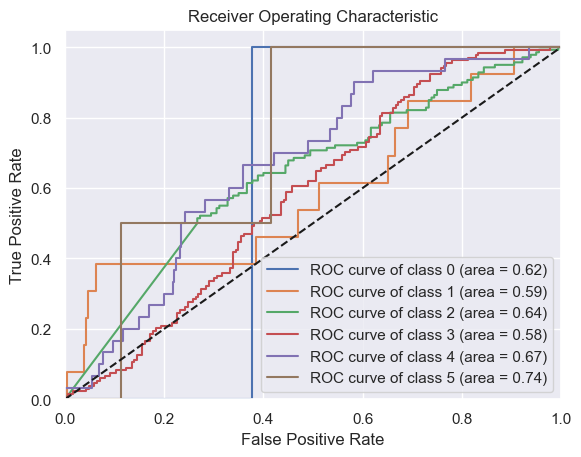

In [279]:
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()